<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
1.Importing required libraries:



In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import kruskal
from scipy.stats import f_oneway
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from scipy.stats import anderson
import random
from datetime import datetime
from sklearn.cluster import KMeans
from geopy.distance import distance
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mannwhitneyu
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
import shap
from sklearn.decomposition import FastICA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest, f_classif
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import MiniBatchKMeans
import gc 
from torch.utils.data import DataLoader, TensorDataset
from sklearn.cluster import MiniBatchKMeans
from itertools import combinations
import torch.nn as nn
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.mixture import GaussianMixture
from itertools import combinations
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler



In [2]:
import warnings
warnings.filterwarnings("ignore")

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
Importing the train Dataset¶


In [3]:
df = pd.read_csv("C:/MS SOLUTIONS DATA/fraudTrain.csv")
print(df.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
 Data undrestanding

trans_date_trans_time: Timestamp of the transaction in date and time format.

cc_num: Credit card number used for the transaction 

merchant (commerçant): Name or identifier of the merchant where the transaction occurred.

category: Category or type of services purchased from the merchant.

amt: Amount of money involved in the transaction.

first: First name of the cardholder.

last: Last name of the cardholder.

gender: Gender of the cardholder.

street: Street address of the cardholder

city: City where the cardholder resides.

state: State where the cardholder resides.

zip: ZIP code of the cardholder's location.

lat: Latitude of the cardholder's location.

long: Longitude of the cardholder's location.

city_pop: Population of the city where the cardholder resides.

job: Occupation or job title of the cardholder.

dob: Date of birth of the cardholder.

trans_num: Unique transaction number or identifier.

unix_time: Transaction timestamp in UNIX time format 

merch_lat: Latitude of the merchant's location.

merch_long: Longitude of the merchant's location.

is_fraud: Binary indicator (0 or 1) indicating whether the transaction is fraudulent (1) or not (0).


La latitude et la longitude sont des coordonnées géographiques utilisées pour spécifier la position d'un point sur la surface de la Terre. Voici ce qu'elles représentent :

Latitude : C'est la distance nord-sud d'un point par rapport à l'équateur. Les latitudes sont mesurées en degrés, avec 0° à l'équateur, des valeurs positives vers le nord et des valeurs négatives vers le sud, allant jusqu'à ±90° aux pôles nord et sud respectivement.

Longitude : C'est la distance est-ouest d'un point par rapport au méridien de Greenwich, en Angleterre. Les longitudes sont également mesurées en degrés, avec des valeurs positives à l'est du méridien de Greenwich et des valeurs négatives à l'ouest, allant jusqu'à ±180° à l'international Date Line.

In [4]:
df.head(15)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

So we have 22 features and our target is is_fraud 


In [6]:
print(df.shape)


(1296675, 23)


In [7]:
df.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
print("check duplicates values :",df.duplicated().sum())
print("check null values: ",df.isnull().sum())



check duplicates values : 0
check null values:  Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


There is no null values or duplicates 

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
 Exploration data analysis



# Distributions 

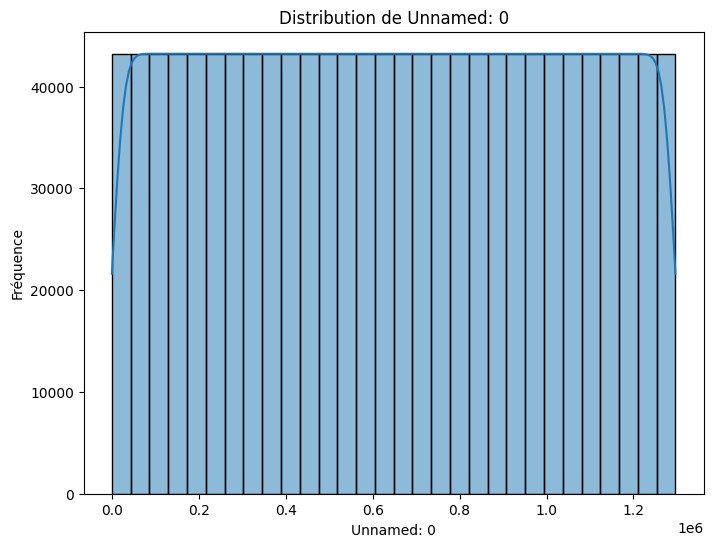

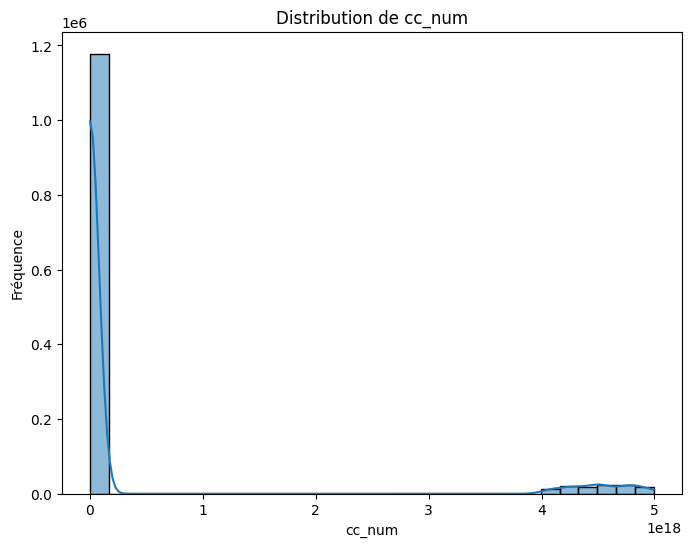

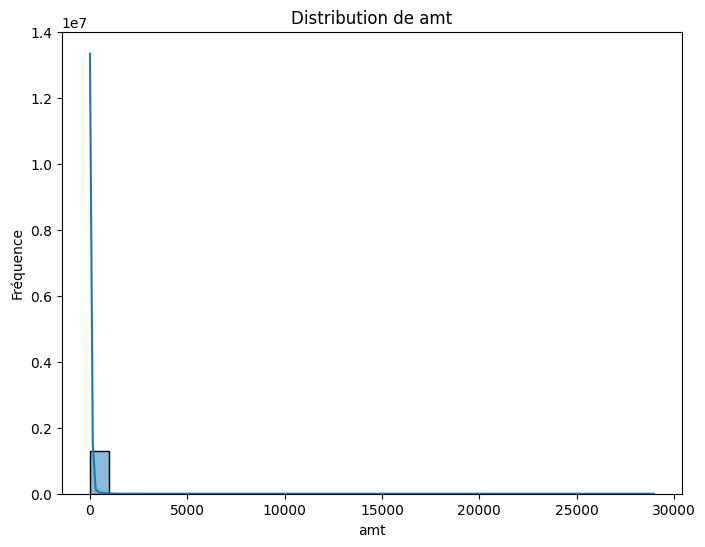

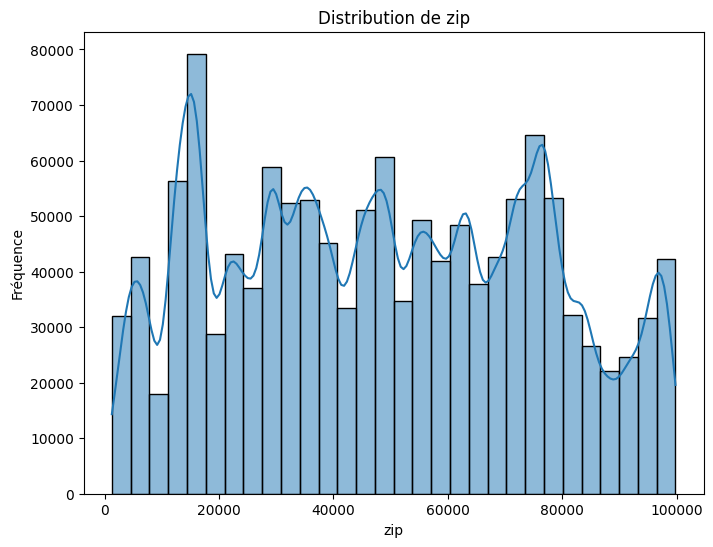

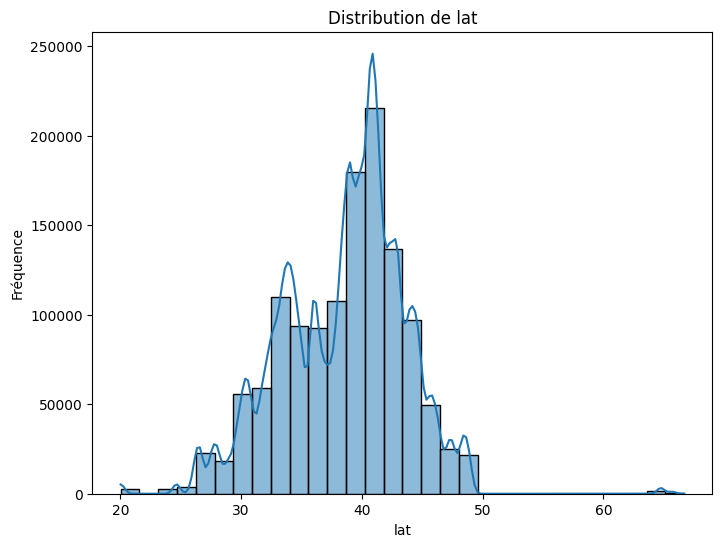

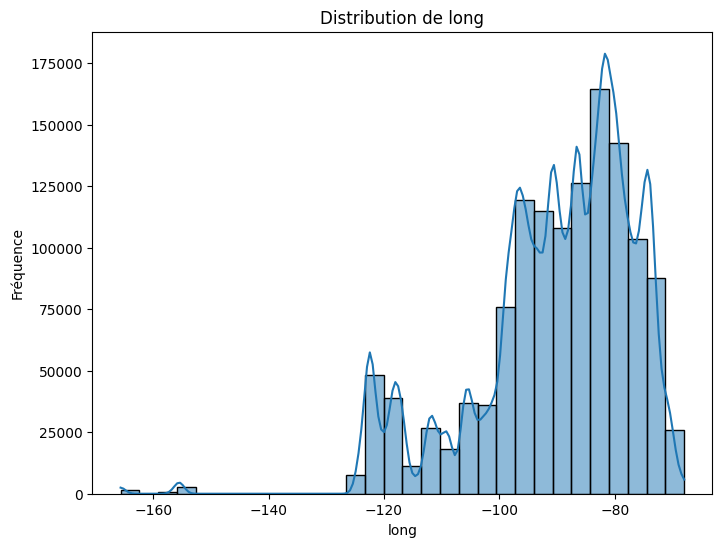

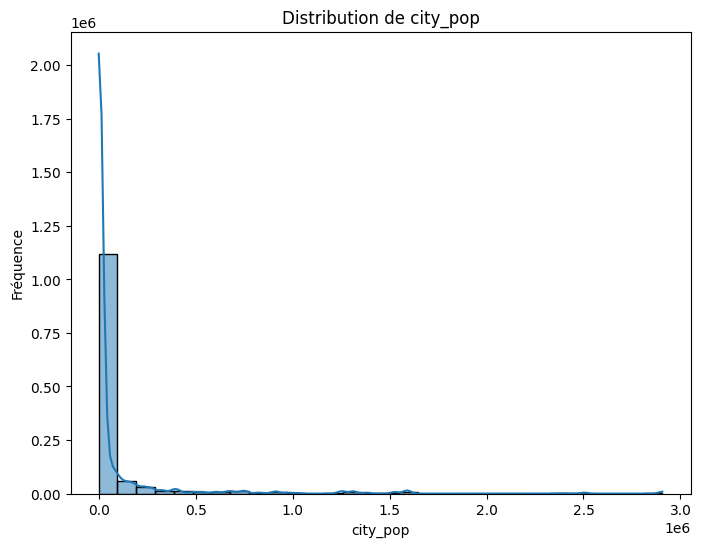

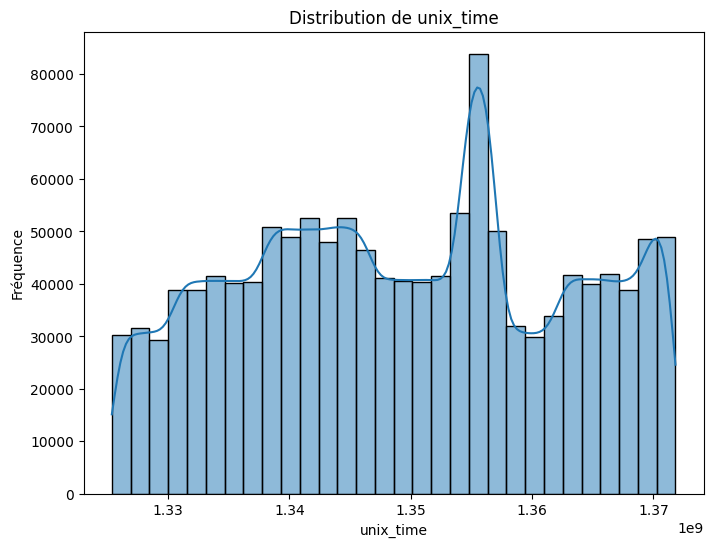

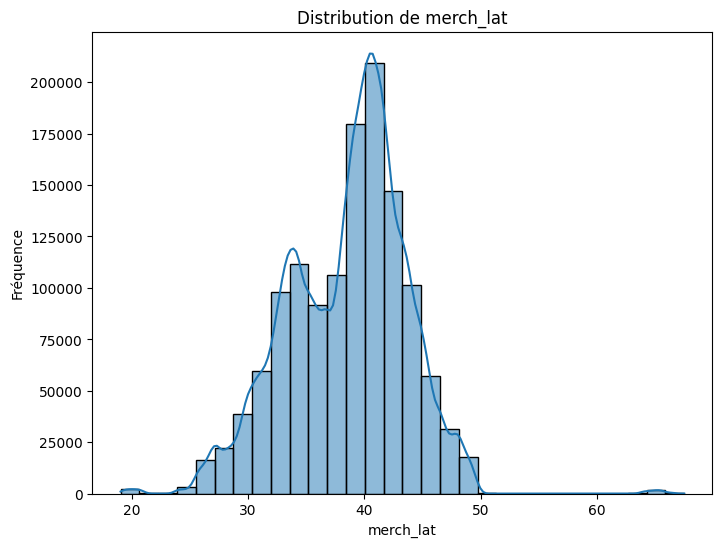

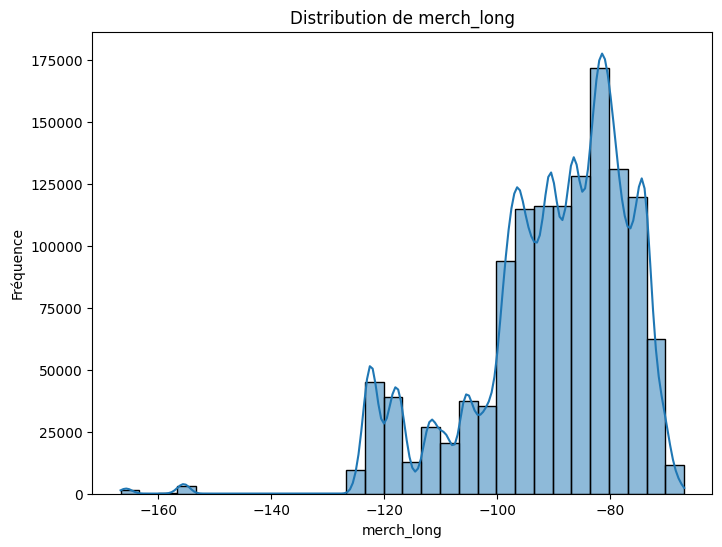

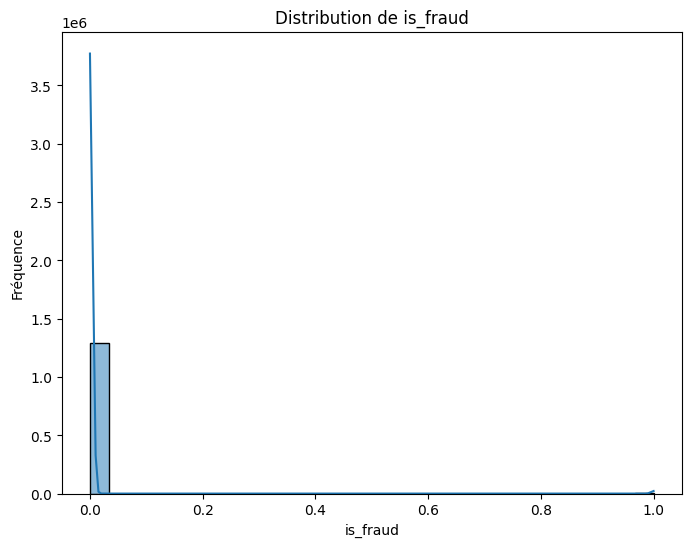

In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()


## Anderson-Darling Test:

In [10]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
for col in numeric_cols:
    if df[col].isnull().any().any():
      print(f"La colonne '{col}' contient des valeurs NaN.")
    else:
        result = anderson(df[col].values.flatten()) 
        print(f"Pour la colonne '{col}': Statistique de test = {result.statistic}, p-valeurs = {result.critical_values}, Niveaux de signification = {result.significance_level}")

Pour la colonne 'Unnamed: 0': Statistique de test = 14418.192772584734, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'cc_num': Statistique de test = 428103.90966790216, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'amt': Statistique de test = 206341.01284768642, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'zip': Statistique de test = 11495.5306374121, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'lat': Statistique de test = 8215.220308872405, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la colonne 'long': Statistique de test = 25909.31246205489, p-valeurs = [0.576 0.656 0.787 0.918 1.092], Niveaux de signification = [15.  10.   5.   2.5  1. ]
Pour la c

We can observe that these values do not follow a normal distribution, which can potentially hinder the convergence of algorithms that rely on probability assumptions. Therefore, we may need to opt for algorithms that are not sensitive to distributional assumptions in the modeling phase

# Relationships 

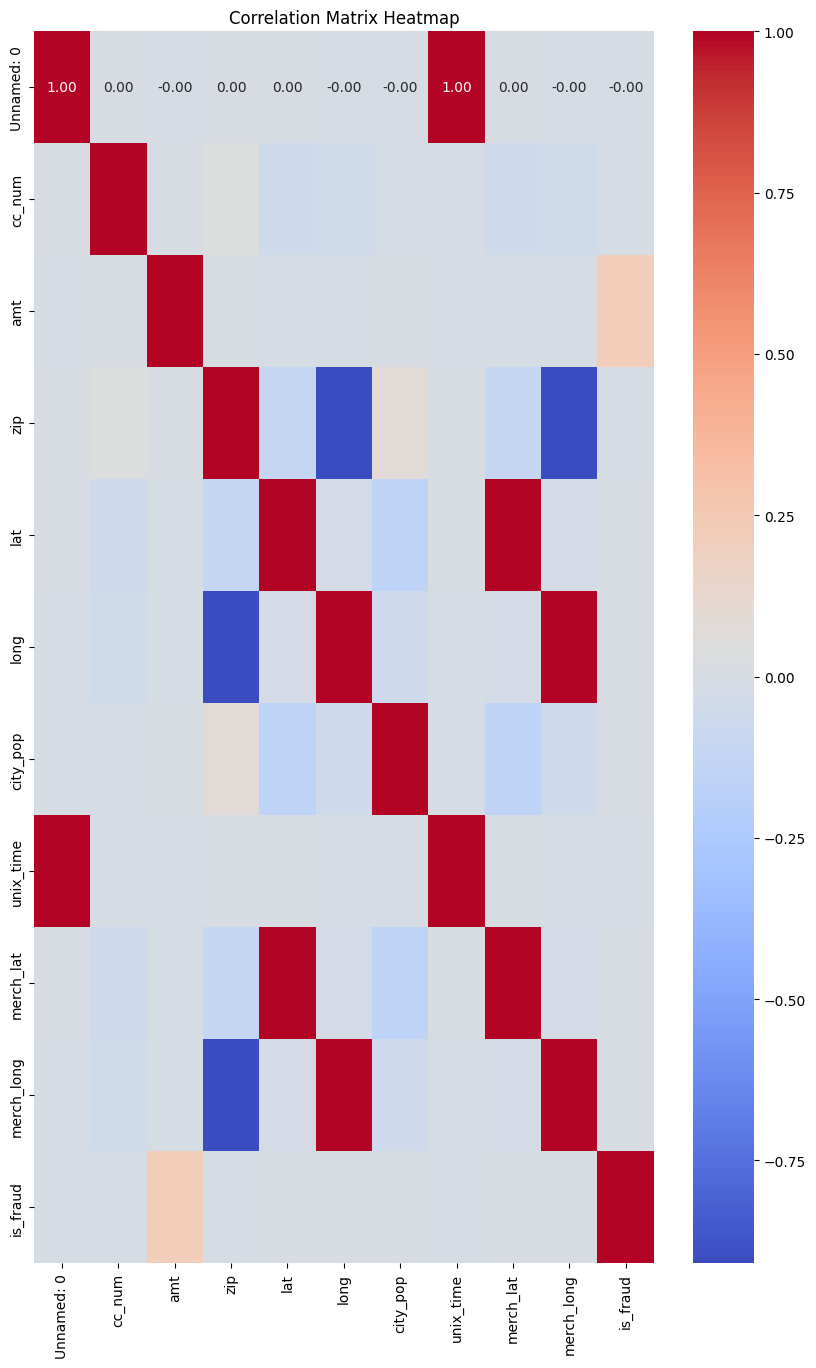

In [11]:
def correlation_matrix_heatMap(df):
    numeric_data = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10,16))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap')
    plt.show()
correlation_matrix_heatMap(df)

In [12]:
def find_highly_correlated_features(df):
    threshold = 0.75
    numerical_df = df.select_dtypes(include=[np.number])
    
    correlation_matrix = numerical_df.corr()
    correlated_features = np.where(np.abs(correlation_matrix) > threshold)
    correlated_features = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*correlated_features)
                           if x != y and x < y]
    
    correlated_features_dict = {}
    for f1, f2 in correlated_features:
        if f1 not in correlated_features_dict:
            correlated_features_dict[f1] = [f2]
        else:
            correlated_features_dict[f1].append(f2)
    
    return correlated_features_dict
highly_correlated = find_highly_correlated_features(df)
for feature, correlated in highly_correlated.items():
    print(f"Feature '{feature}' is highly correlated with: [ {' , '.join(correlated)} ]")

Feature 'Unnamed: 0' is highly correlated with: [ unix_time ]
Feature 'zip' is highly correlated with: [ long , merch_long ]
Feature 'lat' is highly correlated with: [ merch_lat ]
Feature 'long' is highly correlated with: [ merch_long ]


-unnamed contains just the indices so it's not useful . so we will drop it in the data preparation 
unix time is an important feature for fraud detection so we will keep it

-Transaction numbers can sometimes indicate the sequence or order of transactions, which can be relevant in detecting anomalies or patterns that suggest fraudulent behavior for example unusual spikes in transaction numbers, gaps in sequences. so we are not going to drop it in the data preparation phase .

-Long , merch long and zip can provide geographical contect 
but zip may provide more specific location data compared to longtitude . to be more sure about this we should see the feature importance.

-Merch_long specifically relates to the longitude of the merchant location where the transaction takes place. This can be important for detecting anomalies, such as transactions occurring far from the usual merchant locations associated with a cardholder.


-First and last are not useful for fraud detection so we should drop it next in the data preparation phase 



## Histograms

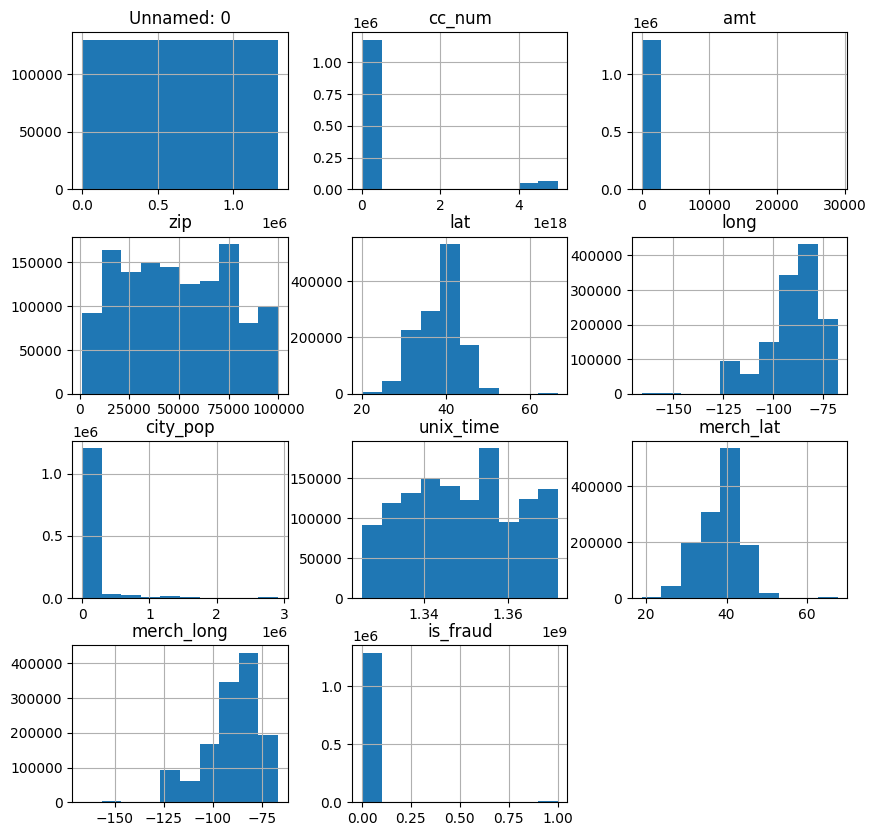

In [13]:
df.hist(figsize = (10, 10))
plt.show()

- From the histograms, it is evident that lat and merchant latitude share the same distribution and exhibit similar values, as do longitude and merchant longitude. Therefore, we need to examine the relationship of each with the target variable and then decide which ones to retain or drop.


- A location with a positive latitude and a negative longitude is situated in the northwest quadrant of the geographical map, relative to the global reference point of the Prime Meridian at Greenwich.


- Unix time, often referred to as "Unix time" or "epoch time," is a widely used time measurement system in computer systems.


- Transaction ZIP codes are distributed relatively evenly, with notable peaks around certain intervals. This could indicate specific geographical areas with higher transaction activity.


- Latitude (lat):
- The distribution is skewed to the right, with most transactions concentrated around 35 to 45 degrees latitude. This could  reflect a concentration of transactions in specific geographical regions (for example, in the Northern Hemisphere).


- City Population (city_pop):
- The distribution of city populations is uniformly spread with peaks at the extremes. This suggests that transactions occur in cities of various sizes, with notable peaks in both highly populous and less populous cities.

## Scatter plot 

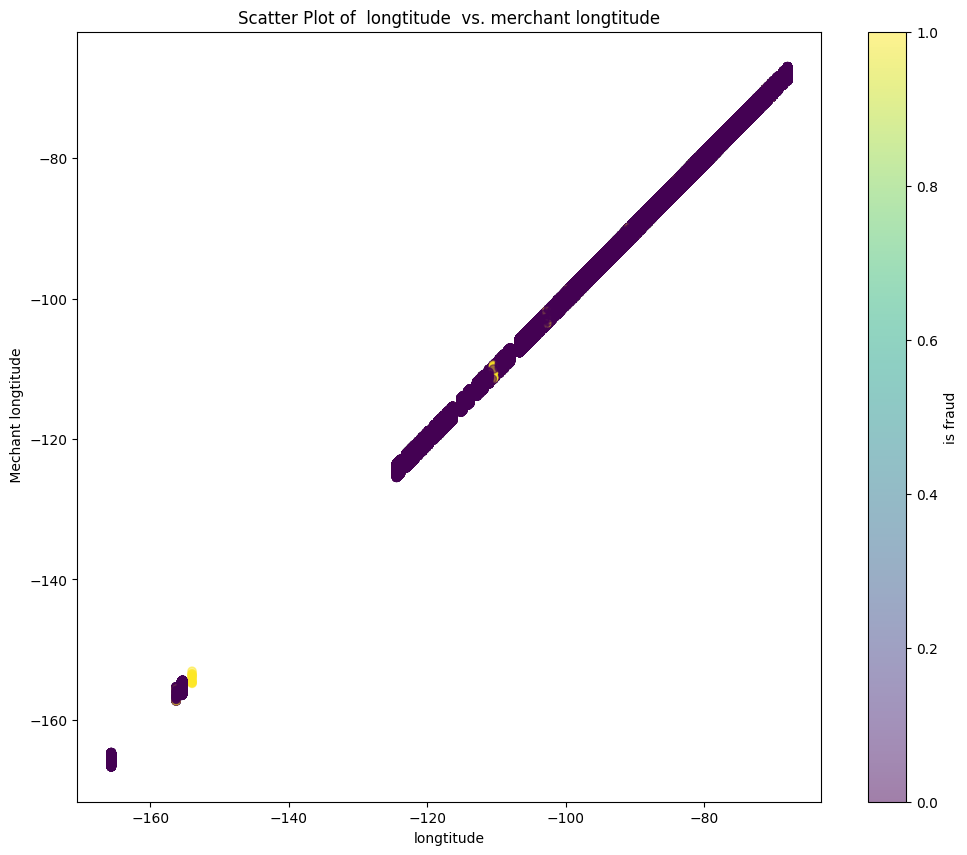

In [14]:
 long =df['long']
 merch_long=df['merch_long']
 labels=df['is_fraud'] 
 plt.figure(figsize=(12, 10))
 plt.scatter(long,merch_long, c=labels, cmap='viridis', alpha=0.5)
 plt.xlabel('longtitude')
 plt.ylabel(' Mechant longtitude')
 plt.title('Scatter Plot of  longtitude  vs. merchant longtitude')
 plt.colorbar(label='is fraud')
 plt.show() 

From the scatter plot, both merchant longitude and longitude show correlation with the target variable. Therefore, we cannot decide which one to drop solely based on the scatter plot. Instead, we should examine the unique values of each variable.

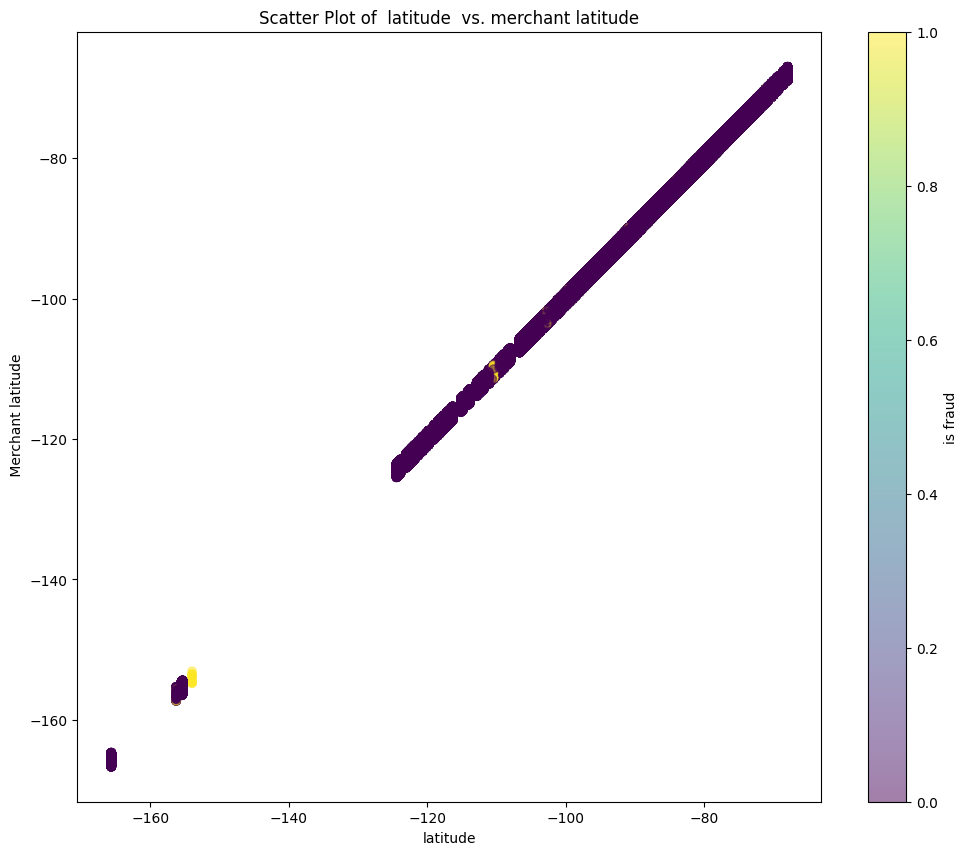

In [15]:
latitude=df['lat']
merch_lat=df['merch_lat']
labels=df['is_fraud'] 
plt.figure(figsize=(12, 10))
plt.scatter(long,merch_long, c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('latitude')
plt.ylabel(' Merchant latitude')
plt.title('Scatter Plot of  latitude  vs. merchant latitude')
plt.colorbar(label='is fraud')
plt.show() 

From the scatter plot, both merchant latitude and latitude show correlation with the target variable. Therefore, we cannot decide which one to drop solely based on the scatter plot. Instead, we should examine the unique values of each variable.

In [16]:
latitude=df['lat'].nunique()
merchantlat=df['merch_lat'].nunique()
print("Number of unique values for 'latitude':",latitude)
print("Number of unique values for 'merchantlatitude':",merchantlat)

Number of unique values for 'latitude': 968
Number of unique values for 'merchantlatitude': 1247805


as we can see the unique values of merchant latitude is greater than latitude so we can drop latitude in the data preparation phase but before dropping it we can extract meaningful features from it


In [17]:
trans_date_trans_time=df['trans_date_trans_time'].nunique()
unix_time=df['unix_time'].nunique()
print("Number of unique values for 'longtitude':",trans_date_trans_time)
print("Number of unique values for 'merchantlongtitude':",unix_time)

Number of unique values for 'longtitude': 1274791
Number of unique values for 'merchantlongtitude': 1274823


As we can observe, the number of unique values in merchant longitude is greater than that in longitude. Therefore, we can drop longitude during the data preparation phase to eliminate redundancy we can extract meaningful features from it


## Relationship between zip and merch_long


1- Anova test 

In [18]:

grouped = df.groupby('zip')['merch_long']
zip_groups = [grouped.get_group(zip_code) for zip_code in df['zip'].unique()]

statistic, p_value = f_oneway(*zip_groups)
print(f"Test ANOVA : Statistique={statistic}, p-valeur={p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Il y a une différence statistiquement significative entre les moyennes des longitudes des commerçants selon les codes postaux.")
else:
    print("Il n'y a pas de différence statistiquement significative entre les moyennes des longitudes des commerçants selon les codes postaux.")


Test ANOVA : Statistique=758973.2011894716, p-valeur=0.0
Il y a une différence statistiquement significative entre les moyennes des longitudes des commerçants selon les codes postaux.


2- Kruskal-Wallis test 

In [19]:
zip_groups = []
for zip_code, group_data in df.groupby('zip')['merch_long']:
    zip_groups.append(group_data.values)
kruskal_stat, p_value = kruskal(*zip_groups)
print(f"Test de Kruskal-Wallis : Statistique = {kruskal_stat}, p-valeur = {p_value}")
alpha = 0.05  
if p_value < alpha:
    print("La différence entre les groupes est statistiquement significative.")
else:
    print("Il n'y a pas suffisamment de preuves pour conclure à une différence significative entre les groupes.")


Test de Kruskal-Wallis : Statistique = 1292727.7843323264, p-valeur = 0.0
La différence entre les groupes est statistiquement significative.


This result suggests that these two variables capture distinct and significant geographical variations. Therefore, I will retain both features and assess the influence of each during the modeling phase.


# Exploring Time 

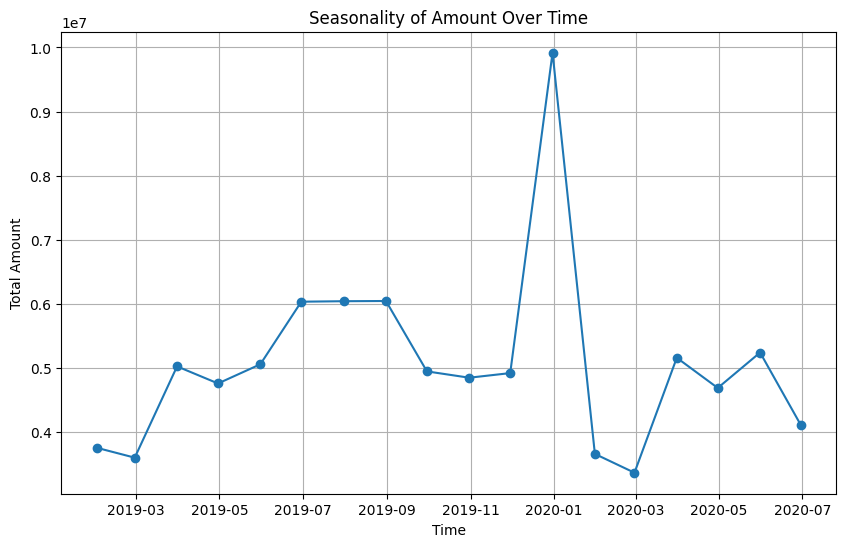

In [20]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
monthly_amount = df.resample('ME', on='trans_date_trans_time')['amt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_amount.index, monthly_amount.values, marker='o')
plt.title('Seasonality of Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()



We can observe a peak in transaction amounts from December 2020 to January 2021, which may be attributed to a significant event such as Christmas or a fraudulent attempt.

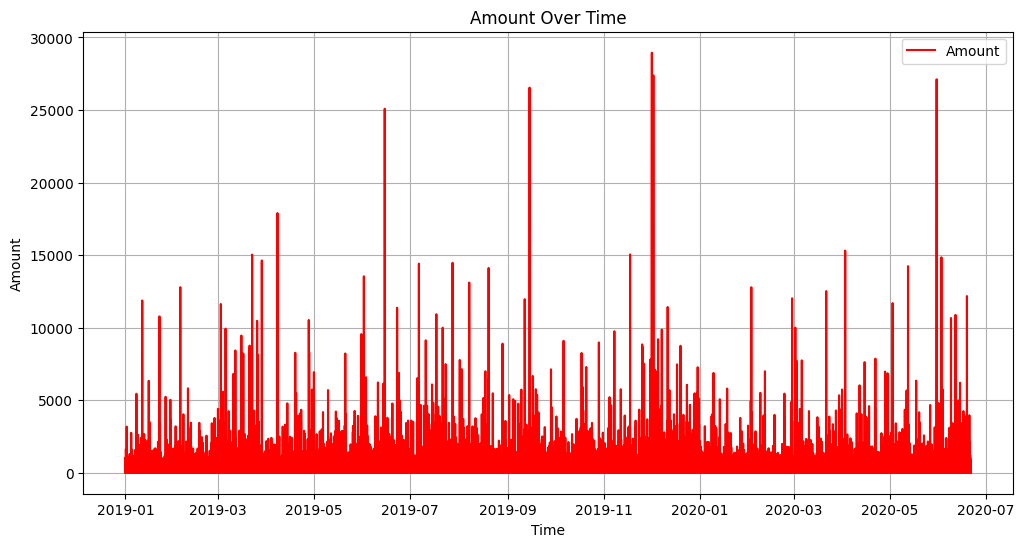

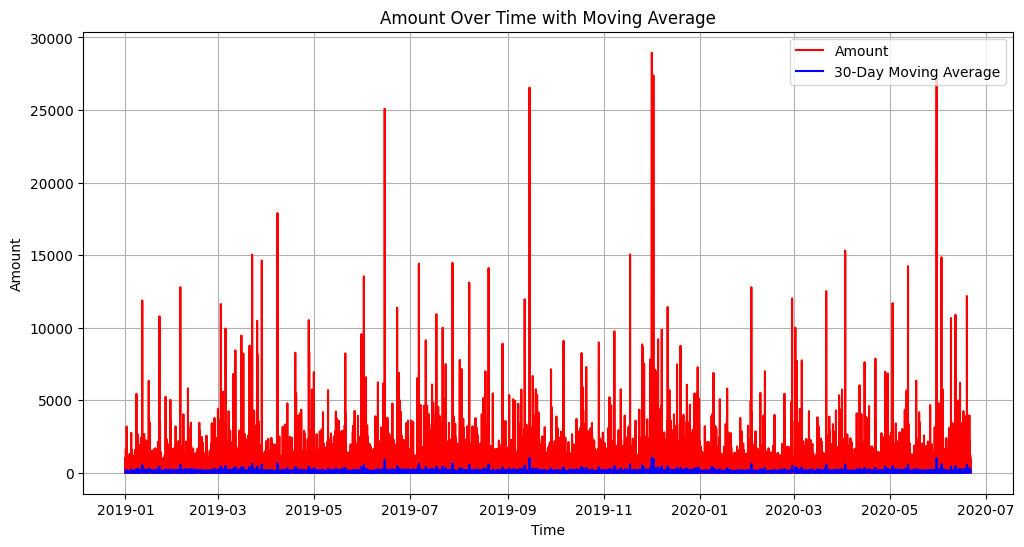

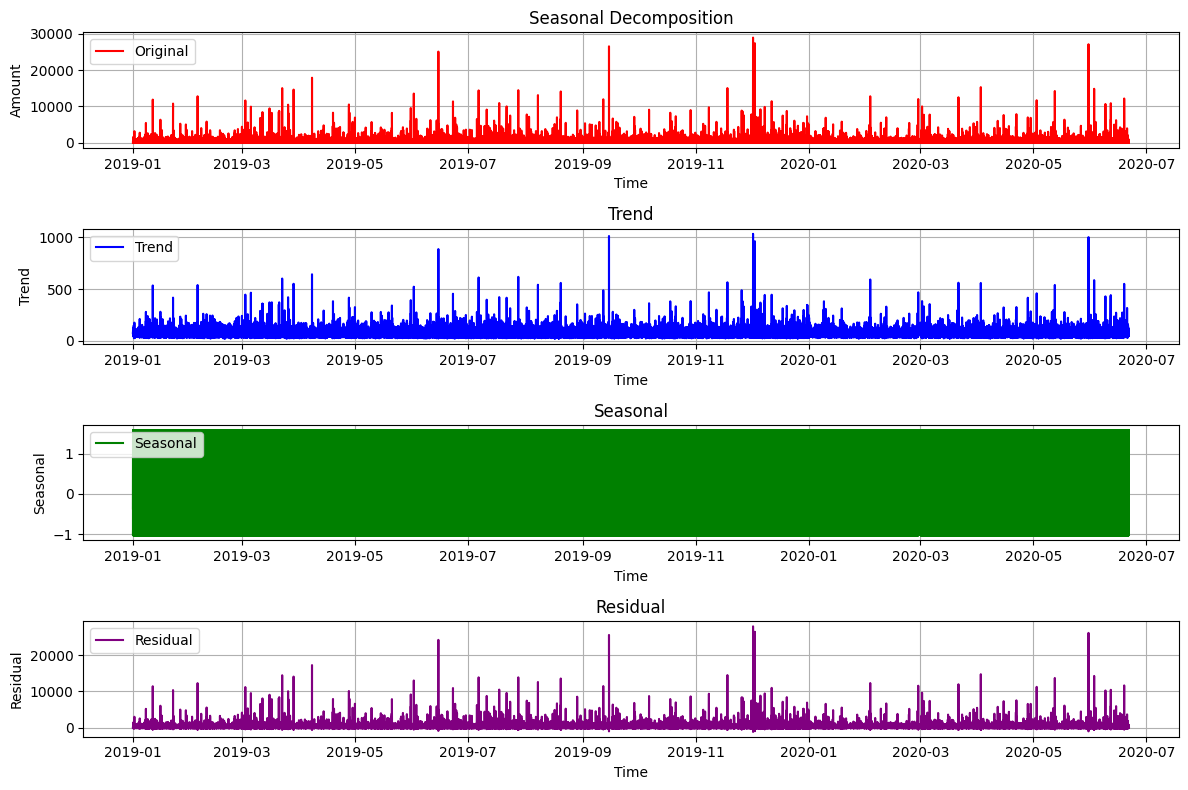

In [21]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df = df.sort_values(by='trans_date_trans_time')
plt.figure(figsize=(12, 6))
plt.plot(df['trans_date_trans_time'], df['amt'], color='red', label='Amount')
plt.title('Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.grid(True)
plt.legend(loc='upper right') 
plt.show()
window = 30 
df['rolling_mean'] = df['amt'].rolling(window=window).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['trans_date_trans_time'], df['amt'], color='red', label='Amount')
plt.plot(df['trans_date_trans_time'], df['rolling_mean'], color='blue', label=f'{window}-Day Moving Average')
plt.title('Amount Over Time with Moving Average')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()

result = seasonal_decompose(df['amt'], model='additive', period=30)  
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['trans_date_trans_time'], df['amt'], color='red', label='Original')
plt.title('Seasonal Decomposition')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()

plt.subplot(412)
plt.plot(df['trans_date_trans_time'], result.trend, color='blue', label='Trend')
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.grid(True)
plt.legend()

plt.subplot(413)
plt.plot(df['trans_date_trans_time'], result.seasonal, color='green', label='Seasonal')
plt.title('Seasonal')
plt.xlabel('Time')
plt.ylabel('Seasonal')
plt.grid(True)
plt.legend()

plt.subplot(414)
plt.plot(df['trans_date_trans_time'], result.resid, color='purple', label='Residual')
plt.title('Residual')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



## Seasonality:
 The bottom plot (Seasonal) shows a flat line, which means there is no regular pattern in transaction volumes from January 2019 to July 2020. This makes it easier to spot unusual transactions.

## Trend:
 The trend line has occasional spikes but doesn't show a clear overall increase or decrease. These sudden increases in transaction amounts at irregular times suggest there may be specific events or conditions causing these spikes, possibly related to unusual or fraudulent activities.




# ACF AND PACF 

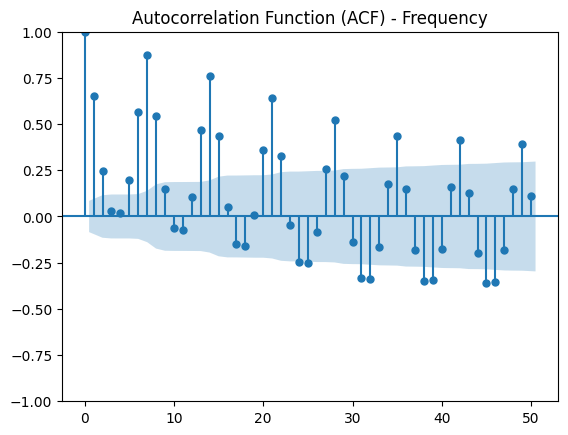

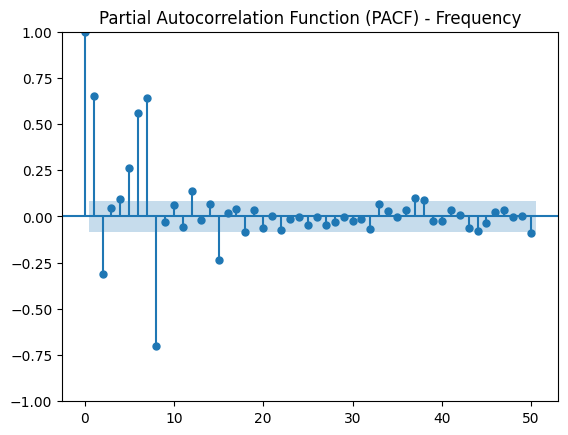

In [22]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
data_frequency = df['trans_date_trans_time'].dt.date.value_counts().sort_index()
plot_acf(data_frequency, lags=50)
plt.title('Autocorrelation Function (ACF) - Frequency')
plt.show()
plot_pacf(data_frequency, lags=50)
plt.title('Partial Autocorrelation Function (PACF) - Frequency')
plt.show()


From the ACF and PACF analyses, we can confirm the absence of seasonality or trend in the data, along with the presence of white noise. While white noise typically represents random variation and might seem like lost information, in our case, it indicates that each transaction observation is independent of others. This independence makes it easier to distinguish between normal and abnormal transactions.

## Fréquence des catégories 

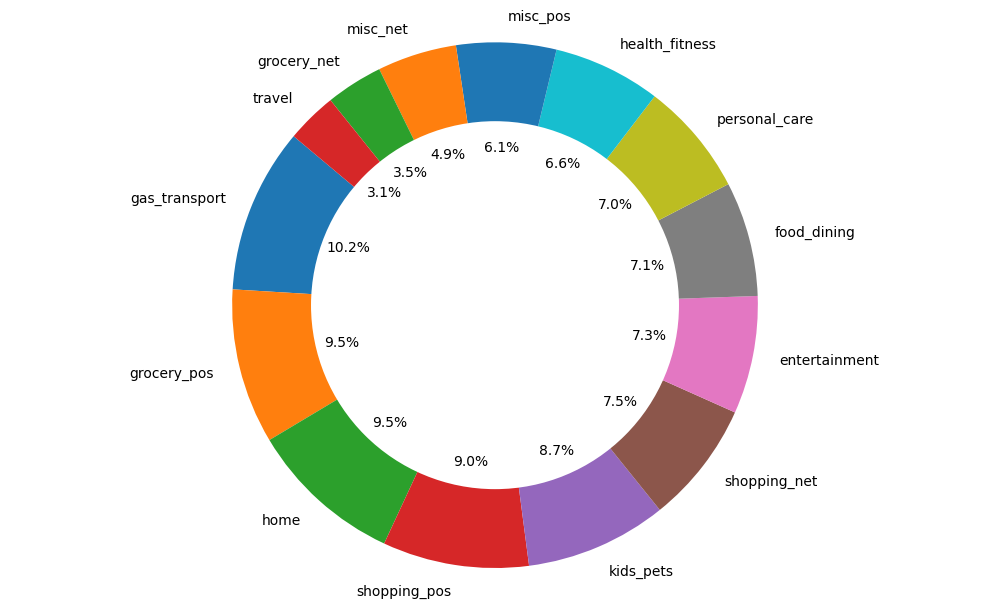

In [23]:
data_categories = df['category'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(data_categories, labels=data_categories.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()


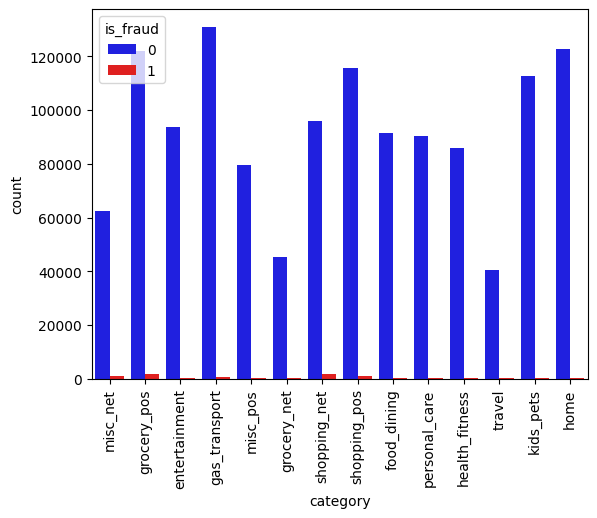

In [24]:
custom_palette = {0: "blue", 1: "red"}  
plot = sns.countplot(x='category', hue='is_fraud', data=df, palette=custom_palette)
plt.xticks(rotation=90)
plt.show()


- The categories like "misc net," "grocery pos," "shopping net," and "shopping pos" are often targeted for fraud attempts.

- These categories typically involve a high volume of transactions daily, making it easier for fraudulent transactions .

- The nature of these transactions provides opportunities for fraudsters to exploit vulnerabilities in payment systems, whether through stolen credentials, identity theft, or other methods.

## Number of credit fraud by city 

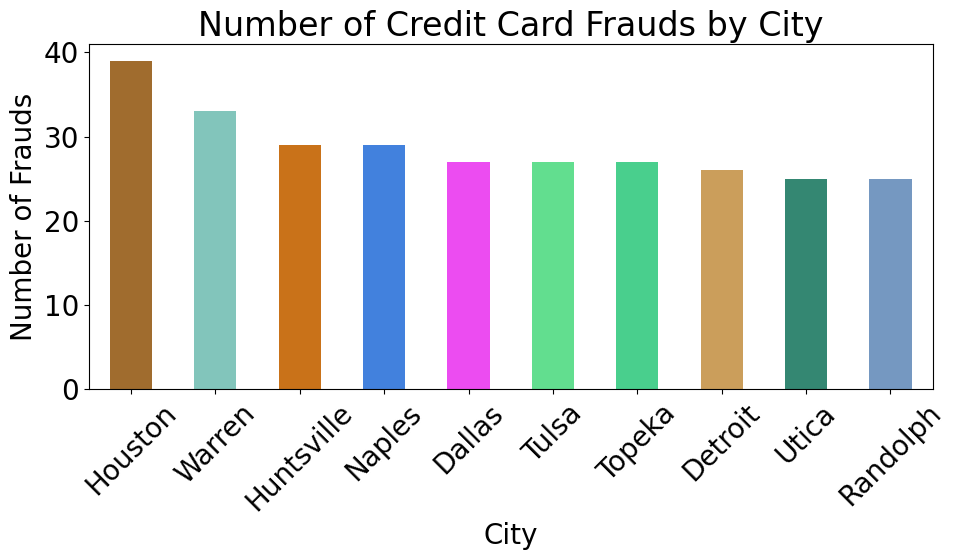

In [25]:
def randomcolor():
    r = random.random()
    g = random.random()
    b = random.random()
    return (r, g, b)
plt.rcParams.update({'font.size': 20})
fraud_cases = df[df['is_fraud'] == 1]
fraud_counts_by_city = fraud_cases['city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
fraud_counts_by_city.plot(kind="bar", color=[randomcolor() for _ in range(len(fraud_counts_by_city))])
plt.title("Number of Credit Card Frauds by City")
plt.xlabel("City")
plt.ylabel("Number of Frauds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Houston, warren Huntsville and Naples report the most frauds city wise.



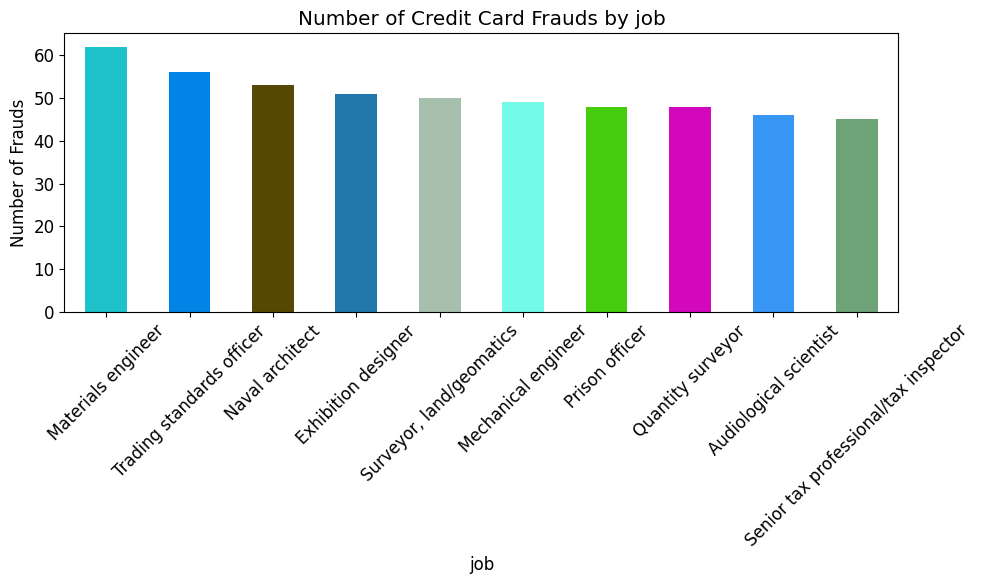

In [26]:
plt.rcParams.update({'font.size': 12})
fraud_cases = df[df['is_fraud'] == 1]
fraud_counts_by_job= fraud_cases['job'].value_counts().head(10)
plt.figure(figsize=(10, 6))
fraud_counts_by_job.plot(kind="bar", color=[randomcolor() for _ in range(len(fraud_counts_by_job))])
plt.title("Number of Credit Card Frauds by job")
plt.xlabel("job")
plt.ylabel("Number of Frauds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Materials engineer , trading standards officer and naval architect  report the most frauds jobs.


### Fraud transaction based on gender 

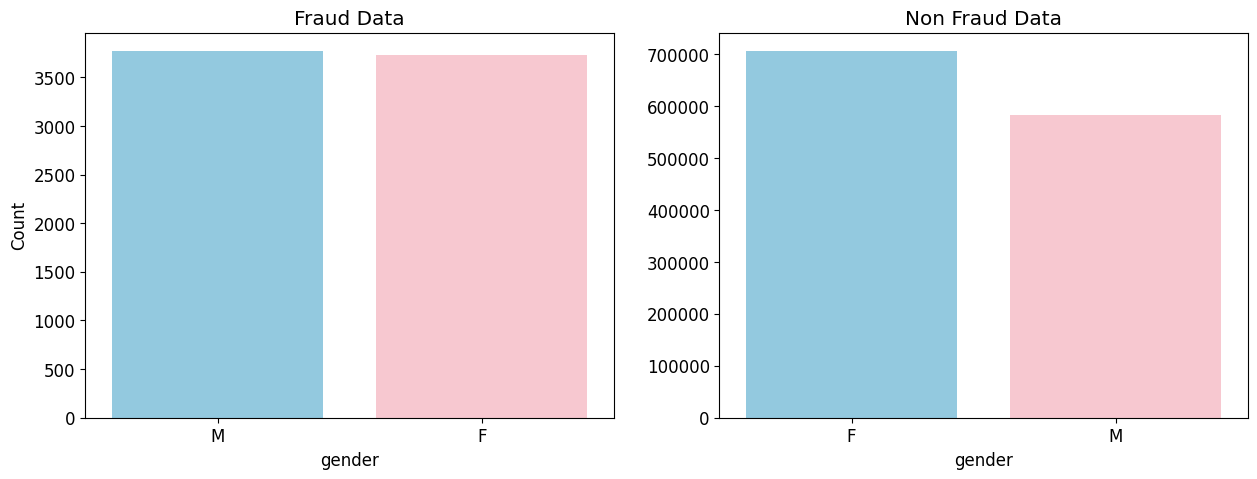

In [27]:
df_fraud = df[df['is_fraud'] == 1]
df_nonfraud = df[df['is_fraud'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='gender', data=df_fraud, palette=['skyblue', 'pink'], ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_ylabel('Count') 

sns.countplot(x='gender', data=df_nonfraud, palette=['skyblue', 'pink'], ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_ylabel('')  

plt.show()

Both genders are involved in fraudulent and non-fraudulent transactions

## Amount analysis

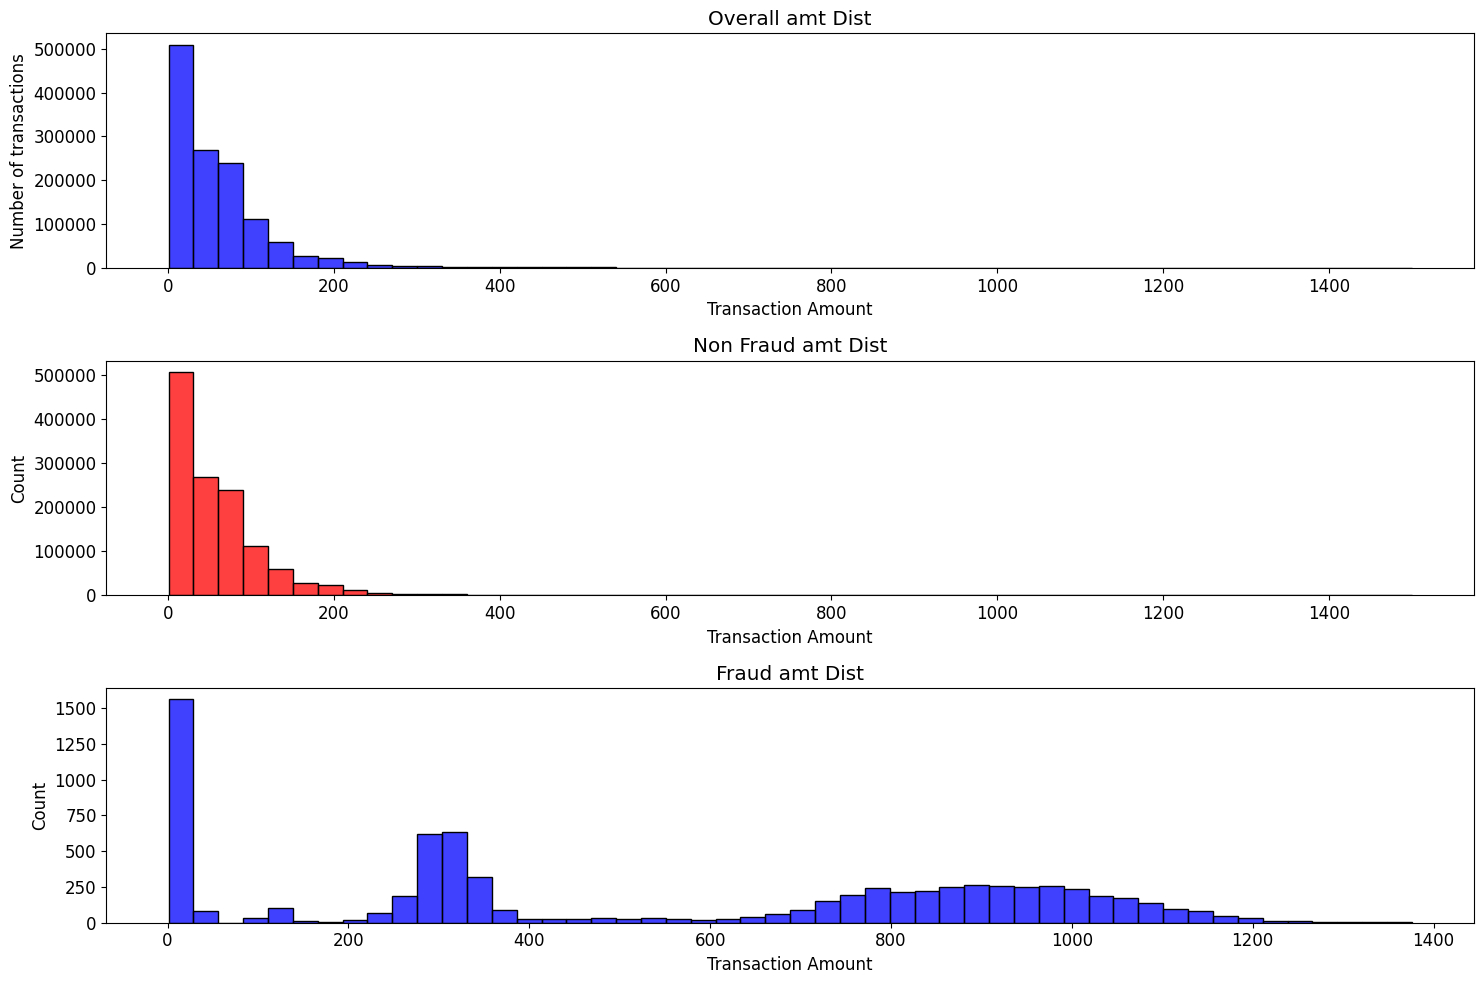

In [28]:
fig, plots = plt.subplots(figsize=(15, 10), nrows=3, ncols=1)
sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plots[0], color='blue')
sns.histplot(df[(df.is_fraud == 0) & (df.amt <= 1500)].amt, bins=50, ax=plots[1], color='red')
sns.histplot(df[(df.is_fraud == 1) & (df.amt <= 1500)].amt, bins=50, ax=plots[2], color='blue')
plots[0].set_title('Overall amt Dist')
plots[1].set_title('Non Fraud amt Dist')
plots[2].set_title('Fraud amt Dist')
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[0].set_ylabel('Number of transactions')

plt.tight_layout()
plt.show()


 Les transactions non frauduleuses ont tendance à être de montants faibles, tandis que les transactions frauduleuses montrent une plus grande diversité de montants, y compris des montants significativement plus élevés.

#### Amount Spent in different states 


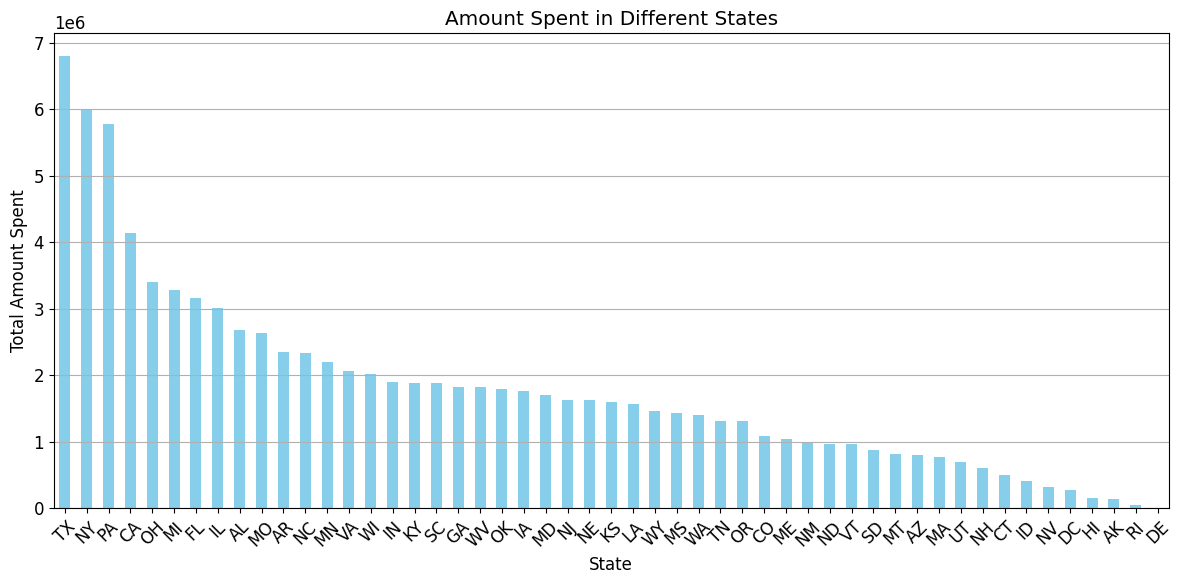

In [29]:
state_spending = df.groupby('state')['amt'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_spending.plot(kind='bar', color='skyblue')
plt.title('Amount Spent in Different States')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Bubble plots 

### Merchant Analysis

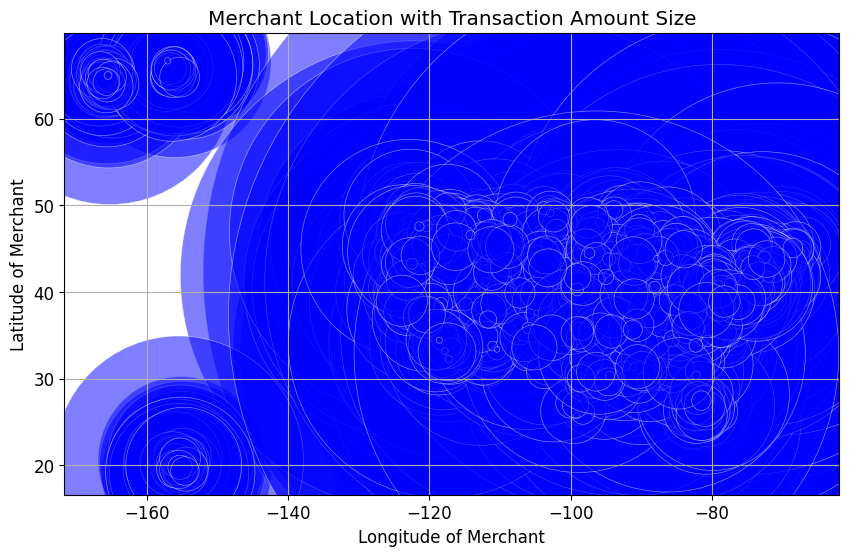

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df['merch_long'], df['merch_lat'], s=df['amt']*10, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.xlabel('Longitude of Merchant')
plt.ylabel('Latitude of Merchant')
plt.title('Merchant Location with Transaction Amount Size')
plt.grid(True)
plt.show()

-Each circle on the plot represents a merchant location.

-The color gradient in the plot represents the transaction amount size, transitioning from blue at the center to white towards the edges. This suggests that there are varying levels of transaction sizes across the merchant locations.

-the areas with the smallest transactions are located towards the center of the plot.


### City Population vs. Transaction Amount with Gender:


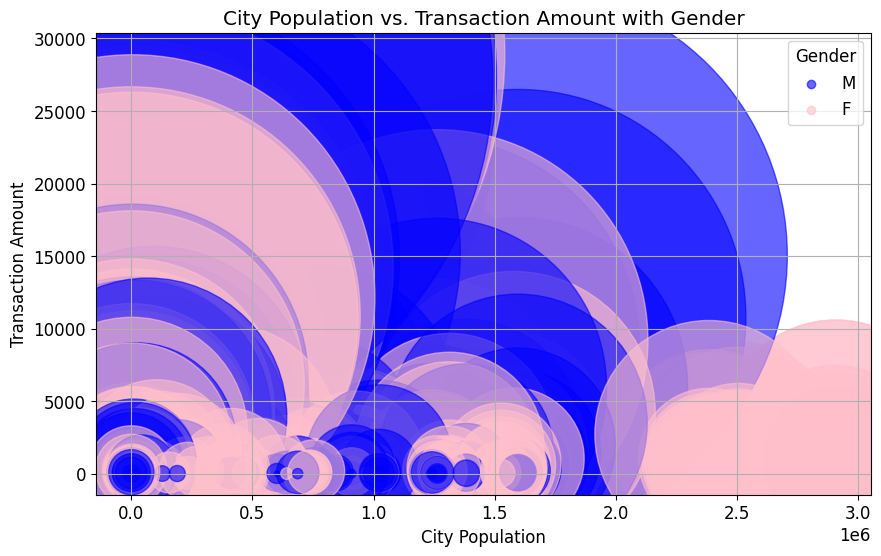

In [31]:
color_map = {'M': 'blue', 'F': 'pink'}

plt.figure(figsize=(10, 6))
plt.scatter(df['city_pop'], df['amt'], 
            s=df['amt'] * 10,  
            c=df['gender'].map(color_map), 
            alpha=0.6)

plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('City Population vs. Transaction Amount with Gender')
plt.grid(True)

for gender in color_map:
    plt.scatter([], [], c=color_map[gender], label=gender, alpha=0.6)
plt.legend(title='Gender')

plt.show()

-Transactions are spread across various city populations, from very small cities to cities with populations up to 3 million.

-There appears to be a higher concentration of transactions in cities with lower populations.

-The transaction amounts vary widely, with some transactions reaching up to 30,000.

-Both genders are involved in high-value transactions.


## Relation between zip , longitude and  latitude 

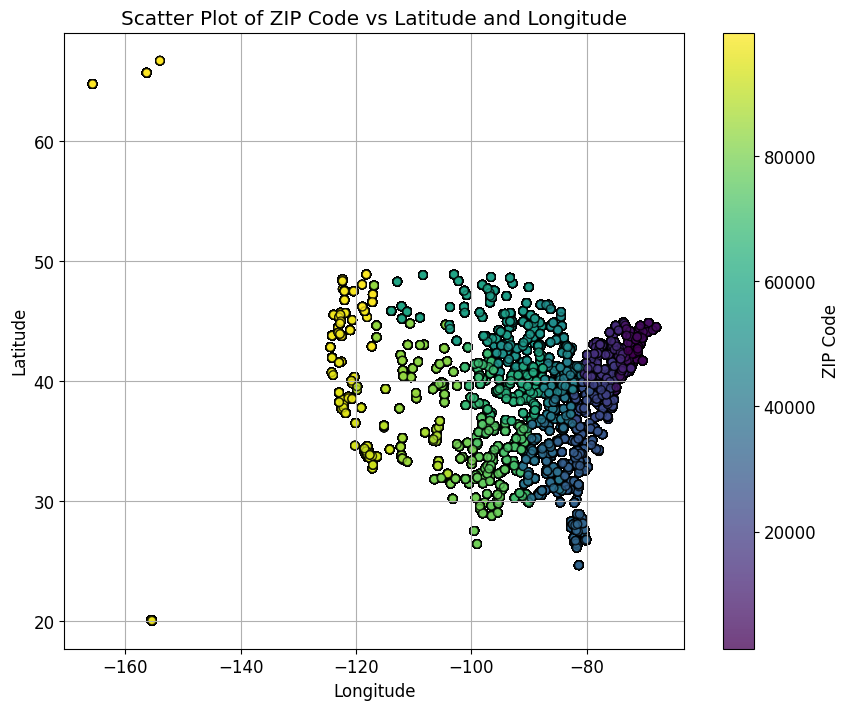

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['zip'], cmap='viridis', alpha=0.75, edgecolors='k')
plt.colorbar(label='ZIP Code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of ZIP Code vs Latitude and Longitude')
plt.grid(True)
plt.show()

- There are isolated points in areas like Alaska (upper left corner) and Hawaii (bottom left corner).
- The densest cluster of points is located in the eastern part of the United States (longitude around -80 to -100).

## Checking for outliers 

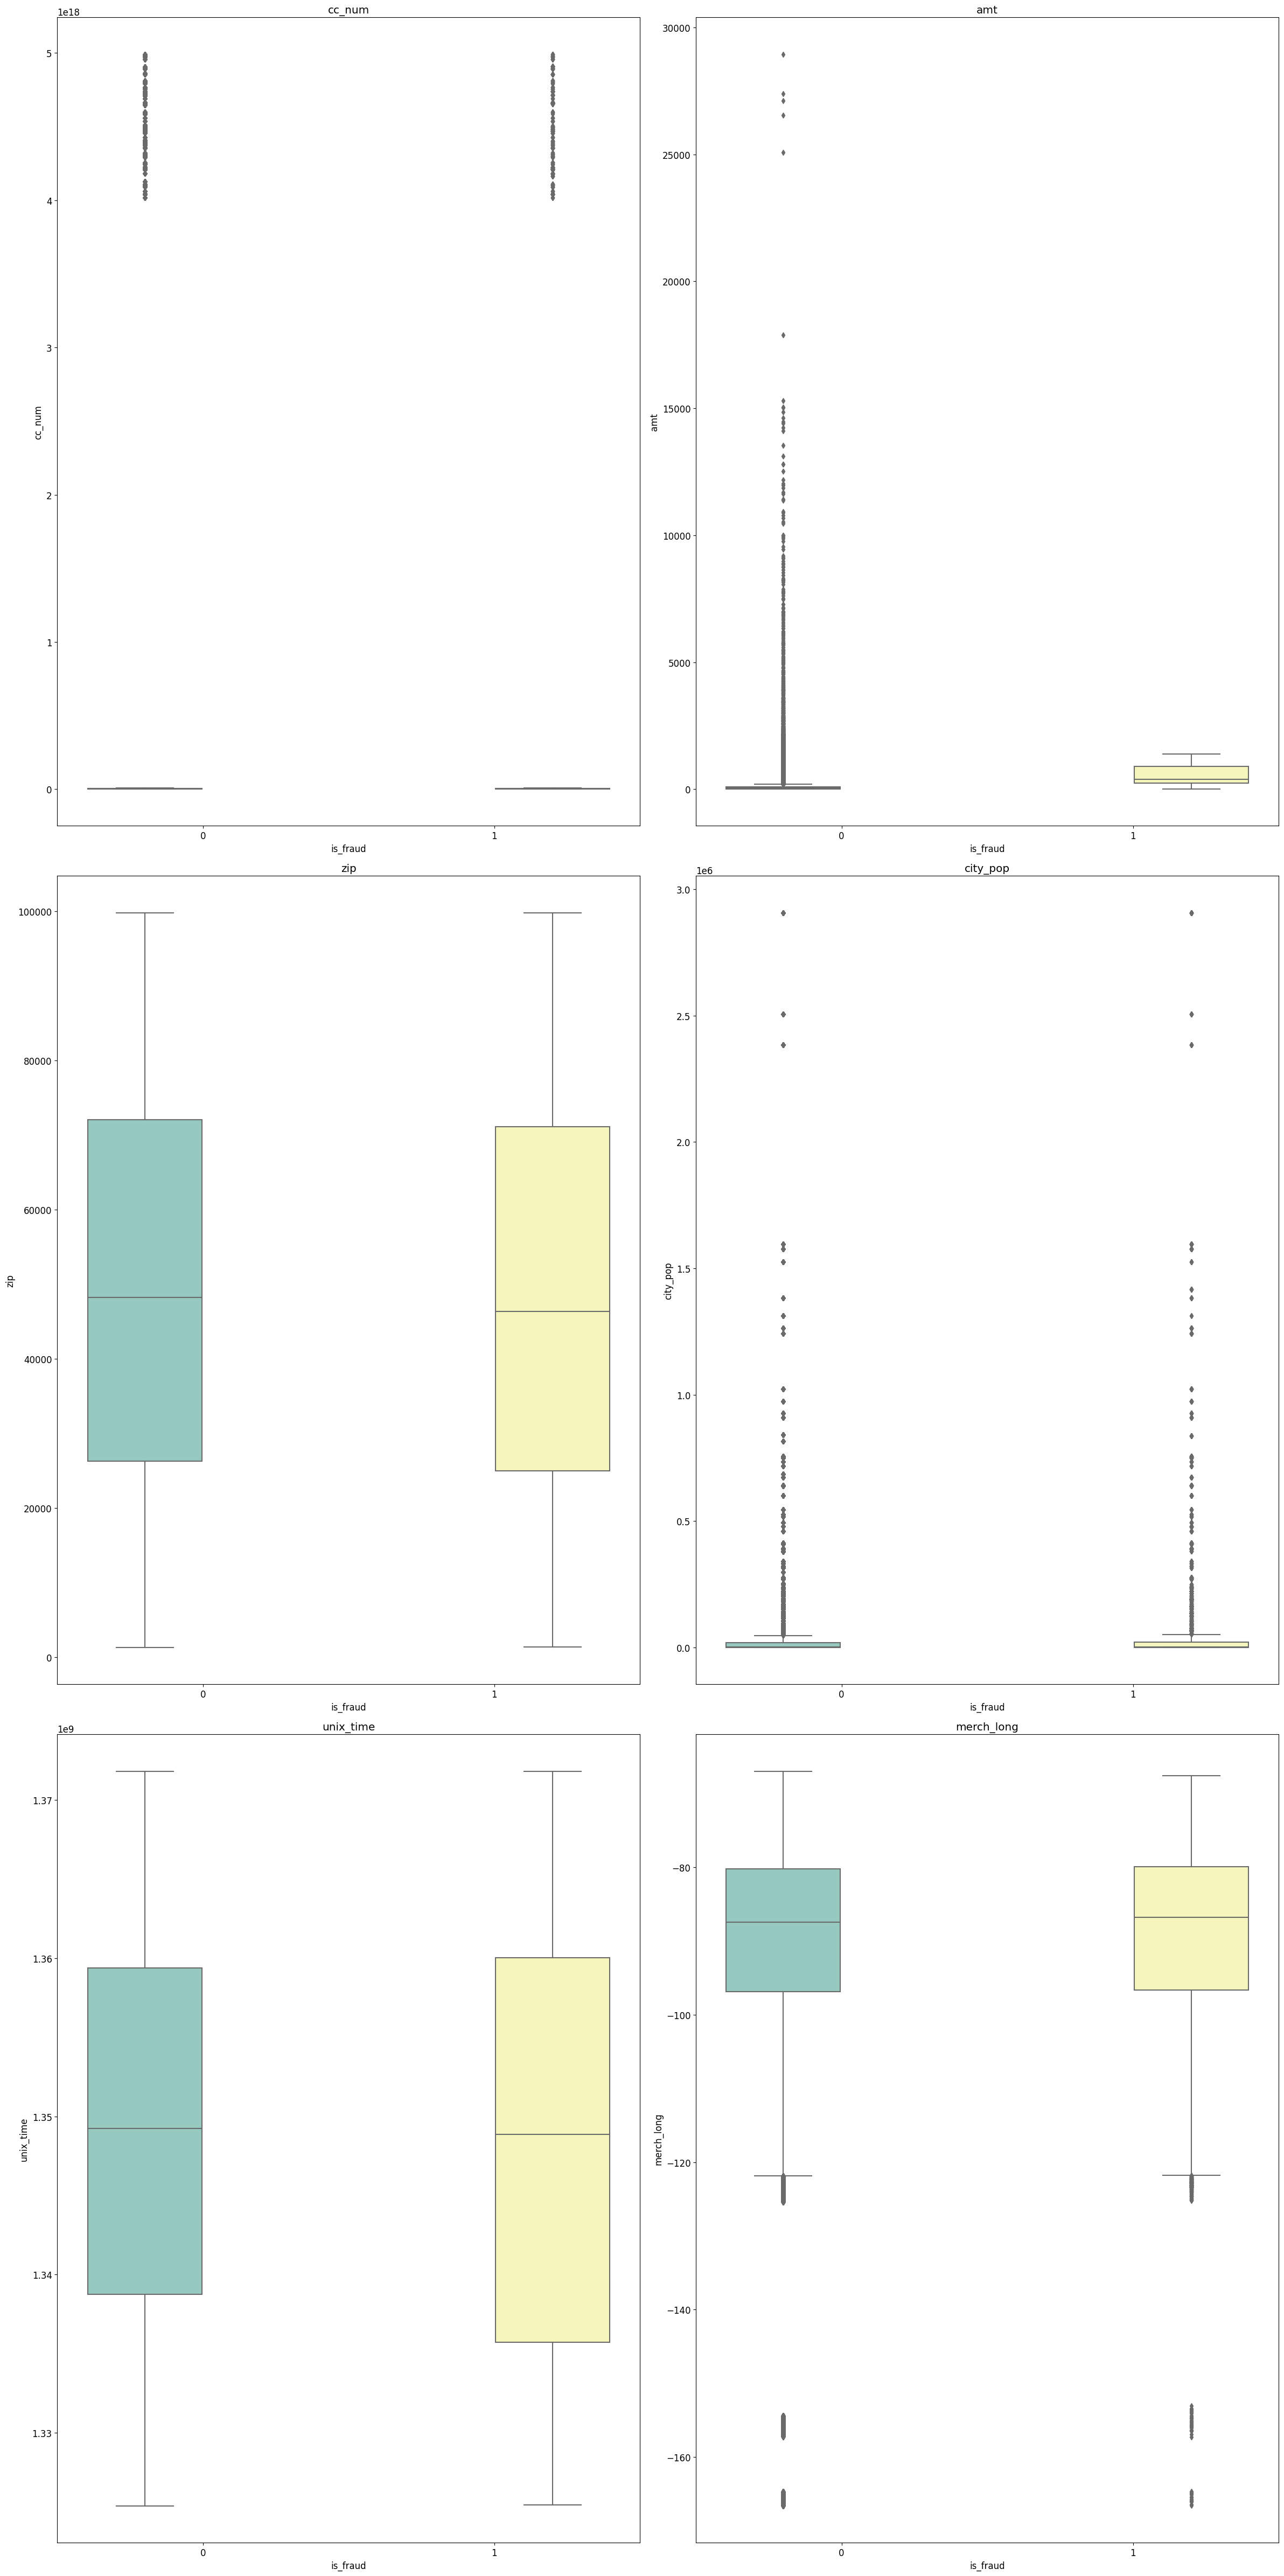

In [33]:
columns_to_visualize = ['cc_num', 'amt', 'zip', 'city_pop', 'unix_time', 'merch_long']
num_rows = (len(columns_to_visualize) - 1) // 2 + 1
num_cols = min(len(columns_to_visualize), 2)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(24, 48))

for idx, column in enumerate(columns_to_visualize):
    row = idx // num_cols
    col = idx % num_cols
    
    sns.boxplot(x=df['is_fraud'], y=df[column], palette="Set3", ax=axes[row, col], hue=df['is_fraud'])
    axes[row, col].set_title(column)
    
    axes[row, col].get_legend().remove()

plt.tight_layout()
plt.show()


-we can notice that there is some outliers in the merch_long because larger cities tend to have numerous merchants, resulting in tighter clusters of 'merch_long' values. In contrast, smaller towns  may have fewer merchants leading to outlier 'merch_long' values.

-city population have some outliers which is normal because cities vary greatly in population size  

-there is some oultiers in the amount which is also normal

-cc_num has a different value for each transaction 

So we don't have to deal with outliers in the data preparation phase .



## DATA distribution

<Axes: title={'center': 'Distribution of fraud'}, ylabel='count'>

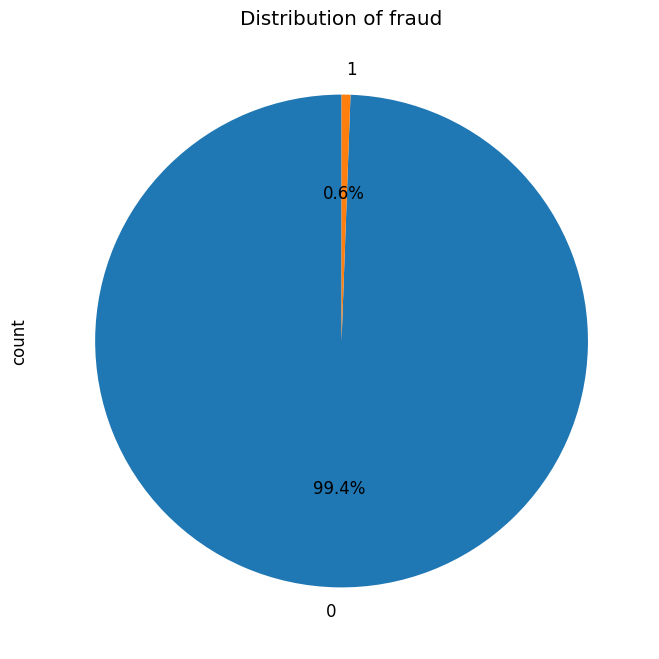

In [34]:
fraud_counts=df['is_fraud'].value_counts()
fraud_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), title='Distribution of fraud')

the data is not balanced 

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
 Reading and Understanding the Test dataset

In [35]:
test =  pd.read_csv("C:/MS SOLUTIONS DATA/fraudTest.csv")
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [36]:
test.shape

(555719, 23)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [38]:
test.describe(include='all')


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


In [39]:
dup =test.duplicated().sum()
dup


0

In [40]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

<div style="background-color: #87CEEB; color: #000000; padding: 10px; border: 2px solid #1E90FF; border-radius: 5px; font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6;">
    I will maintain the separation between the training and test datasets. This separation is crucial to ensure an unbiased evaluation of the model's performance on unseen data.
</div>




<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
Data preparation 

 ## 1. Dropping unuseful and correlated coloumns 


In [41]:
coloumns_to_drop = ['Unnamed: 0','first','last']
data=df.drop(coloumns_to_drop,axis = 1)

In [42]:
data_test=test.drop(coloumns_to_drop,axis = 1)

In [43]:
data.shape


(1296675, 21)

## 2.Encoding :


# 1-Converting dob to age :


In [44]:
def calculate_age(dob):
    dob = datetime.strptime(dob, '%Y-%m-%d')
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age
data['age'] = data['dob'].apply(calculate_age)
data_test['age'] = data_test['dob'].apply(calculate_age)
data= data.drop(columns=['dob'])
data_test = data_test.drop(columns=['dob'])


In [45]:
data


,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,rolling_mean,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,36
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,46
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,62
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,57
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,...,-112.4777,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,56.523000,62
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,...,-77.5101,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,56.322333,44
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,...,-105.8189,899,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,58.012000,56
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,...,-102.5411,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,58.014333,44


In [46]:
data_test

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,56
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,34
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,37
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,58
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,24
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,42
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,58


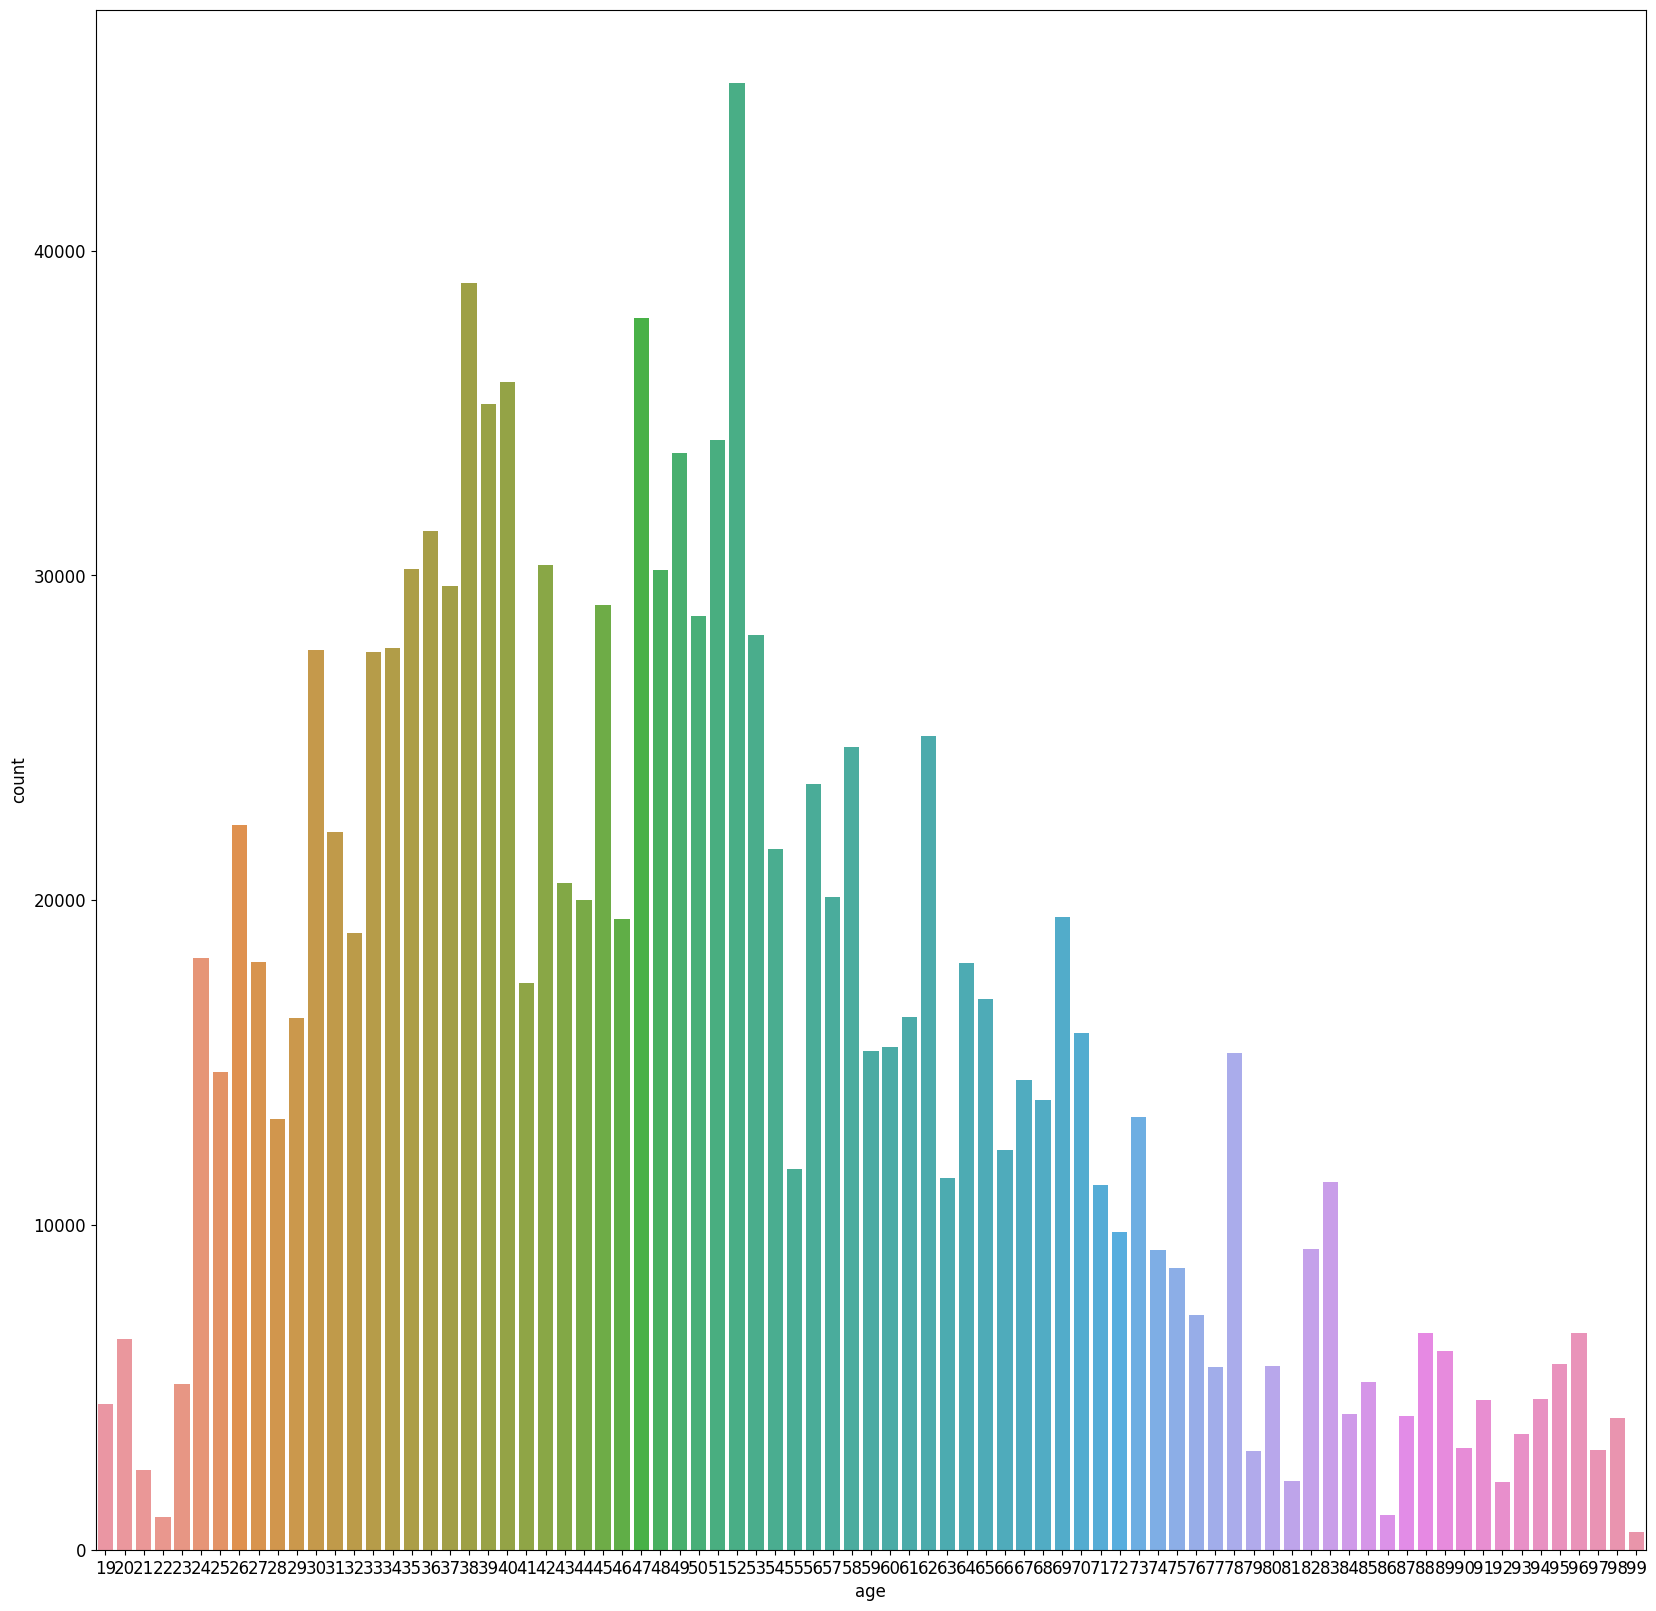

In [47]:
plt.figure(figsize=(20, 20))
sns.countplot(x='age', data=data)
plt.show()


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               1296675 no

## 2-category encoding using MCC 

In [49]:
def find_unique_values(data):
    unique_values = set(data)
    return unique_values
unique_categories = find_unique_values(data.category)
print(unique_categories)
unique_categories_test= find_unique_values(data_test.category)
print(unique_categories_test)


{'shopping_net', 'food_dining', 'shopping_pos', 'misc_net', 'entertainment', 'misc_pos', 'personal_care', 'travel', 'kids_pets', 'grocery_net', 'home', 'gas_transport', 'grocery_pos', 'health_fitness'}
{'food_dining', 'shopping_net', 'shopping_pos', 'entertainment', 'misc_net', 'travel', 'personal_care', 'misc_pos', 'kids_pets', 'home', 'grocery_net', 'grocery_pos', 'gas_transport', 'health_fitness'}


In [50]:
category_to_mcc = {
    'grocery_net': 5411,
    'grocery_pos': 5411,
    'kids_pets': 5933,
    'misc_net': 5999,
    'shopping_pos': 5311,
    'health_fitness': 8099,
    'home': 1520, 
    'gas_transport': 5541,
    'shopping_net': 5941, 
    'personal_care': 5977,
    'entertainment': 7832,
    'misc_pos': 5999,
    'food_dining': 5812,
    'travel': 4722
}

data['mcc'] = data['category'].map(category_to_mcc)
data_test['mcc'] = data_test['category'].map(category_to_mcc)
data.drop(columns=['category'], inplace=True)
data_test.drop(columns=['category'], inplace=True)




In [51]:
data 

,trans_date_trans_time,cc_num,merchant,amt,gender,street,city,state,zip,lat,...,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,rolling_mean,age,mcc
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,36,5999
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,46,5411
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,62,7832
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,57,5541
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,38,5999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,...,258,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,56.523000,62,7832
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,...,100,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,56.322333,44,5812
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,...,899,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,58.012000,56,5812
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,...,1126,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,58.014333,44,5812


## 3- label encoding for gender 


In [52]:
gender_encoding = {
    'M': 0,
    'F': 1
}
data['gender_code'] = data['gender'].map(gender_encoding)
data_test['gender_code'] = data_test['gender'].map(gender_encoding)
data.drop(columns=['gender'], inplace=True)
data_test.drop(columns=['gender'], inplace=True)


## State Encoding 


In [53]:
def compute_state_encoding(df, state_col):
    normalized_counts = 100 * df[state_col].value_counts(normalize=True)
    state_encoding = normalized_counts.to_dict()
    return state_encoding

def apply_state_encoding(df, state_col, state_encoding):
    df[state_col] = df[state_col].map(state_encoding)
    return df

state_encoding_data = compute_state_encoding(data, 'state')
state_encoding_test = compute_state_encoding(data_test, 'state')

data = apply_state_encoding(data, 'state', state_encoding_data)
data_test = apply_state_encoding(data_test, 'state', state_encoding_test)



In [54]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,rolling_mean,age,mcc,gender_code
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,561 Perry Cove,Moravian Falls,2.334124,28654,36.0788,-81.1781,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,36,5999,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,43039 Riley Greens Suite 393,Orient,1.459425,99160,48.8878,-118.2105,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,46,5411,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,594 White Dale Suite 530,Malad City,0.427632,83252,42.1808,-112.2620,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,62,7832,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,9443 Cynthia Court Apt. 038,Boulder,0.906472,59632,46.2306,-112.1138,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,57,5541,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,408 Bradley Rest,Doe Hill,2.255770,24433,38.4207,-79.4629,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,38,5999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,162 Jessica Row Apt. 072,Hatch,0.825110,84735,37.7175,-112.4777,...,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,56.523000,62,7832,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,8617 Holmes Terrace Suite 651,Tuscarora,2.020013,21790,39.2667,-77.5101,...,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,56.322333,44,5812,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,1632 Cohen Drive Suite 639,High Rolls Mountain Park,1.265313,88325,32.9396,-105.8189,...,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,58.012000,56,5812,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,42933 Ryan Underpass,Manderson,0.950431,57756,43.3526,-102.5411,...,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,58.014333,44,5812,0


## City encoding 


In [55]:
def compute_city_encoding(df, city_col):
    normalized_counts_cities = 100 * df[city_col].value_counts(normalize=True)
    city_encoding = normalized_counts_cities.to_dict()
    return city_encoding

def apply_city_encoding(df, city_col, city_encoding):
    df[city_col] = df[city_col].map(city_encoding)
    df[city_col] = df[city_col]
    return df

city_encoding_data = compute_city_encoding(data, 'city')
city_encoding_test = compute_city_encoding(data_test, 'city')
data = apply_city_encoding(data, 'city', city_encoding_data)
data_test = apply_city_encoding(data_test, 'city', city_encoding_test)


In [56]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,rolling_mean,age,mcc,gender_code
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,561 Perry Cove,0.156400,2.334124,28654,36.0788,-81.1781,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,36,5999,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,43039 Riley Greens Suite 393,0.273392,1.459425,99160,48.8878,-118.2105,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,46,5411,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,594 White Dale Suite 530,0.038792,0.427632,83252,42.1808,-112.2620,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,62,7832,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,9443 Cynthia Court Apt. 038,0.038020,0.906472,59632,46.2306,-112.1138,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,57,5541,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,408 Bradley Rest,0.155552,2.255770,24433,38.4207,-79.4629,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,38,5999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,162 Jessica Row Apt. 072,0.116683,0.825110,84735,37.7175,-112.4777,...,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,56.523000,62,7832,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,8617 Holmes Terrace Suite 651,0.040951,2.020013,21790,39.2667,-77.5101,...,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,56.322333,44,5812,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,1632 Cohen Drive Suite 639,0.159639,1.265313,88325,32.9396,-105.8189,...,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,58.012000,56,5812,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,42933 Ryan Underpass,0.156092,0.950431,57756,43.3526,-102.5411,...,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,58.014333,44,5812,0


## Street encoding 

In [57]:
def encode_street(df):
    street_counts = df['street'].value_counts()
    street_encoding = street_counts.rank(method='dense').astype(int).to_dict()
    df['street'] = df['street'].map(street_encoding)
    return df, street_encoding

data, data_street_encoding = encode_street(data)
data_test, data_test_street_encoding = encode_street(data_test)





In [58]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,rolling_mean,age,mcc,gender_code
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,36,5999,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,46,5411,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,62,7832,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,57,5541,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,38,5999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,Geoscientist,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,56.523000,62,7832,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,56.322333,44,5812,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,Naval architect,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,58.012000,56,5812,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,58.014333,44,5812,0


<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
 Feature engineering

### trans_date_trans_time
(ordinal encoding for day_of_week)

In [59]:
def add_time_features(df, timestamp_col='trans_date_trans_time'):
    
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    df['hour_of_day'] = df[timestamp_col].dt.hour
    df['day_of_week'] = df[timestamp_col].dt.dayofweek + 1 
    df['month'] = df[timestamp_col].dt.month
    df['time_since_last_transaction'] = df[timestamp_col].diff().dt.total_seconds()
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [6, 7] else 0)
    df['is_morning'] = df['hour_of_day'].apply(lambda x: 1 if 6 <= x < 18 else 0)
    
    return df

data = add_time_features(data)
data_test = add_time_features(data_test)

print("Training dataset with time features added:")
print(data)

print("\nTest dataset with time features added:")
print(data_test)


Training dataset with time features added:
        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant     amt  street      city  \
0                 fraud_Rippin, Kub and Mann    4.97     245  0.156400   
1            fraud_Heller, Gutmann and Zieme  107.23     364  0.273392   
2                       fraud_Lind-Buckridge  220.11      29  0.038792   
3         fr

In [60]:
null_check = data['time_since_last_transaction'].isnull().sum()
null_check 

1

In [61]:
unique_values = {
    'hour_of_day': data['hour_of_day'].unique(),
    'day_of_week': data['day_of_week'].unique(),
    'time_since_last_transaction': data['time_since_last_transaction'].unique(),
    'month': data['month'].unique(),
    'is_weekend':data['is_weekend'].unique(),
    'is_morning' : data['is_morning'].unique()
}

print("Unique values in 'hour_of_day':", unique_values['hour_of_day'])
print("Unique values in 'day_of_week':", unique_values['day_of_week'])
print("Unique values in 'month':", unique_values['month'])
print("Unique values in 'weekend':", unique_values['is_weekend'])
print("Unique values in 'is_morning':", unique_values['is_morning'])

Unique values in 'hour_of_day': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in 'day_of_week': [2 3 4 5 6 7 1]
Unique values in 'month': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values in 'weekend': [0 1]
Unique values in 'is_morning': [0 1]


In [62]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,rolling_mean,age,mcc,gender_code,hour_of_day,day_of_week,month,time_since_last_transaction,is_weekend,is_morning
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,NaN,36,5999,1,0,2,1,NaN,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,NaN,46,5411,1,0,2,1,26.0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,NaN,62,7832,0,0,2,1,7.0,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,NaN,57,5541,0,0,2,1,25.0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,NaN,38,5999,0,0,2,1,110.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,56.523000,62,7832,0,12,7,6,32.0,1,1
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,56.322333,44,5812,0,12,7,6,11.0,1,1
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,58.012000,56,5812,0,12,7,6,13.0,1,1
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,58.014333,44,5812,0,12,7,6,64.0,1,1


# Transactions occurring during unusual hours
Transactions at Grocery Stores (MCC 5411), Medical Services (MCC 8099), Cosmetic Stores (MCC 5977), and Service Stations (MCC 5541) are excluded from unusual time checks and are not flagged regardless of the time of day.

In [63]:
mcc_exceptions = [5411, 8099, 5977, 5541]
def detect_unusual_time(row):
    hour = row['hour_of_day']
    mcc = row['mcc']
    if mcc in mcc_exceptions:
        return 0
    elif hour < 5 or hour >= 23:
        return 1
    else:
        return 0
data['unusual_time_transaction'] = data.apply(detect_unusual_time, axis=1)
data_test['unusual_time_transaction']=data_test.apply(detect_unusual_time, axis=1)


In [64]:
data.unusual_time_transaction.sum()

139473

In [65]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,age,mcc,gender_code,hour_of_day,day_of_week,month,time_since_last_transaction,is_weekend,is_morning,unusual_time_transaction
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,36,5999,1,0,2,1,NaN,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,46,5411,1,0,2,1,26.0,0,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,62,7832,0,0,2,1,7.0,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,57,5541,0,0,2,1,25.0,0,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,38,5999,0,0,2,1,110.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,62,7832,0,12,7,6,32.0,1,1,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,44,5812,0,12,7,6,11.0,1,1,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,56,5812,0,12,7,6,13.0,1,1,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,44,5812,0,12,7,6,64.0,1,1,0


## Comportement de la Carte

### Montant moyen par transaction sur 7 days , 30 days , 2 weeks , 2 months and  a year:



In [66]:
def add_rolling_mean(df, column_name, window_size=7):
   
    rolling_mean_column = f'{column_name}_rolling_mean_{window_size}d'
    df[rolling_mean_column] = df.groupby('cc_num')[column_name].transform(
        lambda x: x.rolling(window=window_size, min_periods=1).mean()
    )
    return df

window_sizes = [7, 30, 365,15,60,180]

for window_size in window_sizes:
    data = add_rolling_mean(data, 'amt', window_size)
    data_test = add_rolling_mean(data_test, 'amt', window_size)


In [67]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,time_since_last_transaction,is_weekend,is_morning,unusual_time_transaction,amt_rolling_mean_7d,amt_rolling_mean_30d,amt_rolling_mean_365d,amt_rolling_mean_15d,amt_rolling_mean_60d,amt_rolling_mean_180d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,NaN,0,0,1,4.970000,4.970000,4.970000,4.970000,4.970000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,26.0,0,0,0,107.230000,107.230000,107.230000,107.230000,107.230000,107.230000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,7.0,0,0,1,220.110000,220.110000,220.110000,220.110000,220.110000,220.110000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,25.0,0,0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,110.0,0,0,1,41.960000,41.960000,41.960000,41.960000,41.960000,41.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,32.0,1,1,0,33.167143,64.665333,72.835123,80.022000,64.313500,73.217444
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,11.0,1,1,0,84.772857,82.753333,106.192959,89.550667,102.497833,123.582167
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,13.0,1,1,0,41.158571,56.732333,58.047260,51.093333,52.837167,55.976667
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,64.0,1,1,0,83.471429,88.992667,90.638986,77.899333,88.165333,94.411222


### Nombre total de transactions par carte :


In [68]:
def add_num_trans_per_card(df):
    num_trans_per_card = df.groupby('cc_num').size().reset_index(name='num_trans_per_card')
    df = df.merge(num_trans_per_card, on='cc_num', how='left')
    return df

data = add_num_trans_per_card(data)
data_test = add_num_trans_per_card(data_test)



In [69]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,is_weekend,is_morning,unusual_time_transaction,amt_rolling_mean_7d,amt_rolling_mean_30d,amt_rolling_mean_365d,amt_rolling_mean_15d,amt_rolling_mean_60d,amt_rolling_mean_180d,num_trans_per_card
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,0,0,1,4.970000,4.970000,4.970000,4.970000,4.970000,4.970000,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,0,0,0,107.230000,107.230000,107.230000,107.230000,107.230000,107.230000,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,0,0,1,220.110000,220.110000,220.110000,220.110000,220.110000,220.110000,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,0,0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,0,0,1,41.960000,41.960000,41.960000,41.960000,41.960000,41.960000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,1,1,0,33.167143,64.665333,72.835123,80.022000,64.313500,73.217444,1513
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,1,1,0,84.772857,82.753333,106.192959,89.550667,102.497833,123.582167,531
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,1,1,0,41.158571,56.732333,58.047260,51.093333,52.837167,55.976667,2070
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,1,1,0,83.471429,88.992667,90.638986,77.899333,88.165333,94.411222,2024


### Nombre de transactions sur les 30 derniers jours , un an , une semaine et 2 mois:



In [70]:
def add_rolling_count(df, column_name, window_size):
  
    rolling_count_column = f'{column_name}_rolling_count_{window_size}d'
    df[rolling_count_column] = df.groupby('cc_num')[column_name].transform(
        lambda x: x.rolling(window=window_size, min_periods=1).count()
    )
    return df

window_sizes = [30, 365,15 ,60]

for window_size in window_sizes:
    data = add_rolling_count(data, 'trans_num', window_size)
    data_test = add_rolling_count(data_test, 'trans_num', window_size)


In [71]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,amt_rolling_mean_30d,amt_rolling_mean_365d,amt_rolling_mean_15d,amt_rolling_mean_60d,amt_rolling_mean_180d,num_trans_per_card,trans_num_rolling_count_30d,trans_num_rolling_count_365d,trans_num_rolling_count_15d,trans_num_rolling_count_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,4.970000,4.970000,4.970000,4.970000,4.970000,2028,1.0,1.0,1.0,1.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,107.230000,107.230000,107.230000,107.230000,107.230000,3030,1.0,1.0,1.0,1.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,220.110000,220.110000,220.110000,220.110000,220.110000,503,1.0,1.0,1.0,1.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,45.000000,45.000000,45.000000,45.000000,45.000000,493,1.0,1.0,1.0,1.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,41.960000,41.960000,41.960000,41.960000,41.960000,2017,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,64.665333,72.835123,80.022000,64.313500,73.217444,1513,30.0,365.0,15.0,60.0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,82.753333,106.192959,89.550667,102.497833,123.582167,531,30.0,365.0,15.0,60.0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,56.732333,58.047260,51.093333,52.837167,55.976667,2070,30.0,365.0,15.0,60.0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,88.992667,90.638986,77.899333,88.165333,94.411222,2024,30.0,365.0,15.0,60.0


### Fréquence des transactions (transactions par jour) :


In [72]:
def add_avg_daily_trans_per_card(df, date_column='day_of_week'):
    
    df['trans_date'] = df[date_column]
    trans_freq_per_card = df.groupby(['cc_num', 'trans_date']).size().reset_index(name='daily_trans_count')
    daily_trans_avg = trans_freq_per_card.groupby('cc_num')['daily_trans_count'].mean().reset_index().rename(columns={'daily_trans_count': 'avg_daily_trans'})
    df = df.merge(daily_trans_avg, on='cc_num', how='left')
    
    return df

data = add_avg_daily_trans_per_card(data)
data_test = add_avg_daily_trans_per_card(data_test)


 ### Durée de Vie de la Carte

In [73]:
def add_card_age(df, date_column='trans_date_trans_time'):

    first_trans_date = df.groupby('cc_num')[date_column].min().reset_index().rename(columns={date_column: 'first_trans_date'})
    
    df = df.merge(first_trans_date, on='cc_num', how='left')
    
    df['card_age_days'] = (df[date_column] - df['first_trans_date']).dt.days
    
    return df

data = add_card_age(data)
data_test = add_card_age(data_test)


In [74]:
data.card_age_days

0            0
1            0
2            0
3            0
4            0
          ... 
1296670    537
1296671    537
1296672    537
1296673    537
1296674    536
Name: card_age_days, Length: 1296675, dtype: int64

- New credit cards (with low card_age_days) might be more susceptible to fraud immediately after activation. Sudden high-value transactions or an unusually high number of transactions soon after the card is issued can be red flags.

- Cards that have not been used for a long time and suddenly start showing activity can also indicate potential fraud.

transaction based on gender :


In [75]:
def add_gender_transaction_percent(df, gender_column='gender_code', transaction_column='trans_num'):
    
    df_gender = df[[gender_column, transaction_column]].groupby(gender_column).count().reset_index()
    df_gender.columns = ['Gender', 'gender_count']
    
    df_gender['percent_transaction_gender'] = (df_gender['gender_count'] / df_gender['gender_count'].sum()) * 100
    
    df = pd.merge(df, df_gender[['Gender', 'percent_transaction_gender']], left_on=gender_column, right_on='Gender', how='left')
    
    df.drop('Gender', axis=1, inplace=True)
    
    return df

data = add_gender_transaction_percent(data)
data_test = add_gender_transaction_percent(data_test)


In [76]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,num_trans_per_card,trans_num_rolling_count_30d,trans_num_rolling_count_365d,trans_num_rolling_count_15d,trans_num_rolling_count_60d,trans_date,avg_daily_trans,first_trans_date,card_age_days,percent_transaction_gender
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,2028,1.0,1.0,1.0,1.0,2,289.714286,2019-01-01 00:00:18,0,54.744867
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,3030,1.0,1.0,1.0,1.0,2,432.857143,2019-01-01 00:00:44,0,54.744867
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,503,1.0,1.0,1.0,1.0,2,71.857143,2019-01-01 00:00:51,0,45.255133
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,493,1.0,1.0,1.0,1.0,2,70.428571,2019-01-01 00:01:16,0,45.255133
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,2017,1.0,1.0,1.0,1.0,2,288.142857,2019-01-01 00:03:06,0,45.255133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,1513,30.0,365.0,15.0,60.0,7,216.142857,2019-01-01 09:42:51,537,45.255133
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,531,30.0,365.0,15.0,60.0,7,75.857143,2019-01-01 05:40:03,537,45.255133
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,2070,30.0,365.0,15.0,60.0,7,295.714286,2019-01-01 00:09:03,537,45.255133
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,2024,30.0,365.0,15.0,60.0,7,289.142857,2019-01-01 03:37:04,537,45.255133


## Merchant features

Montant moyen par transaction sur les 7 derniers jours , un mois , un an et 2 mois pour chaque commerçant :



In [77]:
def add_merchant_rolling_mean(df, value_column, window_size):
    
    rolling_mean_column = f'merchant_{value_column}_rolling_mean_{window_size}d'
    df[rolling_mean_column] = df.groupby('merchant')[value_column].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
    
    return df

window_sizes = [7,30, 365, 15, 60]

for window_size in window_sizes:
    data = add_merchant_rolling_mean(data, 'amt', window_size)
    data_test = add_merchant_rolling_mean(data_test, 'amt', window_size)


In [78]:
data.merchant_amt_rolling_mean_7d

0            4.970000
1          107.230000
2          220.110000
3           45.000000
4           41.960000
              ...    
1296670     63.622857
1296671     48.961429
1296672     89.594286
1296673     49.594286
1296674     48.980000
Name: merchant_amt_rolling_mean_7d, Length: 1296675, dtype: float64

In [79]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,trans_date,avg_daily_trans,first_trans_date,card_age_days,percent_transaction_gender,merchant_amt_rolling_mean_7d,merchant_amt_rolling_mean_30d,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,2,289.714286,2019-01-01 00:00:18,0,54.744867,4.970000,4.970000,4.970000,4.970000,4.970000
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,2,432.857143,2019-01-01 00:00:44,0,54.744867,107.230000,107.230000,107.230000,107.230000,107.230000
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,2,71.857143,2019-01-01 00:00:51,0,45.255133,220.110000,220.110000,220.110000,220.110000,220.110000
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,2,70.428571,2019-01-01 00:01:16,0,45.255133,45.000000,45.000000,45.000000,45.000000,45.000000
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,2,288.142857,2019-01-01 00:03:06,0,45.255133,41.960000,41.960000,41.960000,41.960000,41.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,7,216.142857,2019-01-01 09:42:51,537,45.255133,63.622857,53.176333,61.278356,41.251333,57.051667
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,7,75.857143,2019-01-01 05:40:03,537,45.255133,48.961429,46.482333,49.202219,43.552667,46.463333
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,7,295.714286,2019-01-01 00:09:03,537,45.255133,89.594286,65.251000,50.232849,77.226667,56.672833
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,7,289.142857,2019-01-01 03:37:04,537,45.255133,49.594286,51.919333,55.690959,46.283333,51.231667


### Nombre de clients uniques par marchand :
Identification des marchands à risque : Les marchands qui attirent un grand nombre de clients uniques peuvent potentiellement être plus à risque, car ils peuvent attirer une plus grande variété de transactions, y compris potentiellement frauduleuses.

In [80]:
def add_unique_clients_per_merchant(df):
   
    unique_clients_per_merchant = df.groupby('merchant')['cc_num'].nunique().reset_index()
    unique_clients_per_merchant.columns = ['merchant', 'unique_clients_count']
    
    df = df.merge(unique_clients_per_merchant, on='merchant', how='left')
    
    return df

data = add_unique_clients_per_merchant(data)
data_test = add_unique_clients_per_merchant(data_test)


In [81]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,avg_daily_trans,first_trans_date,card_age_days,percent_transaction_gender,merchant_amt_rolling_mean_7d,merchant_amt_rolling_mean_30d,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,289.714286,2019-01-01 00:00:18,0,54.744867,4.970000,4.970000,4.970000,4.970000,4.970000,609
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,432.857143,2019-01-01 00:00:44,0,54.744867,107.230000,107.230000,107.230000,107.230000,107.230000,784
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,71.857143,2019-01-01 00:00:51,0,45.255133,220.110000,220.110000,220.110000,220.110000,220.110000,730
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,70.428571,2019-01-01 00:01:16,0,45.255133,45.000000,45.000000,45.000000,45.000000,45.000000,757
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,288.142857,2019-01-01 00:03:06,0,45.255133,41.960000,41.960000,41.960000,41.960000,41.960000,666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,216.142857,2019-01-01 09:42:51,537,45.255133,63.622857,53.176333,61.278356,41.251333,57.051667,732
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,75.857143,2019-01-01 05:40:03,537,45.255133,48.961429,46.482333,49.202219,43.552667,46.463333,701
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,295.714286,2019-01-01 00:09:03,537,45.255133,89.594286,65.251000,50.232849,77.226667,56.672833,725
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,289.142857,2019-01-01 03:37:04,537,45.255133,49.594286,51.919333,55.690959,46.283333,51.231667,724


### Analyse de la récurrence des clients :
 Pour les marchands récurrents, la fidélité des clients peut être un aspect important à étudier.


In [82]:
def analyze_recurring_customers(df):
  
    merchant_customer_counts = df.groupby(['merchant', 'cc_num']).size().reset_index(name='transaction_count')
    
    recurring_customers_per_merchant = merchant_customer_counts[merchant_customer_counts['transaction_count'] > 1]
    
    data_recurring_merchant = pd.merge(df, recurring_customers_per_merchant[['merchant', 'cc_num']], on=['merchant', 'cc_num'], how='inner')
    
    transaction_frequency_merchant = data_recurring_merchant.groupby(['merchant', 'cc_num'])['trans_date_trans_time'].count().reset_index(name='transaction_frequency')
    average_transaction_amount_merchant = data_recurring_merchant.groupby(['merchant', 'cc_num'])['amt'].mean().reset_index(name='average_transaction_amount')
    total_spent_merchant = data_recurring_merchant.groupby(['merchant', 'cc_num'])['amt'].sum().reset_index(name='total_spent')
    
    recurring_customers_analysis_merchant = pd.merge(transaction_frequency_merchant, average_transaction_amount_merchant, on=['merchant', 'cc_num'])
    recurring_customers_analysis_merchant = pd.merge(recurring_customers_analysis_merchant, total_spent_merchant, on=['merchant', 'cc_num'])
    
    return recurring_customers_analysis_merchant

recurring_customers_analysis = analyze_recurring_customers(data)
recurring_customers_analysis_test = analyze_recurring_customers(data_test)

print(recurring_customers_analysis.head())
print(recurring_customers_analysis_test.head())


              merchant        cc_num  transaction_frequency  \
0  fraud_Abbott-Rogahn   60416207185                      3   
1  fraud_Abbott-Rogahn   60422928733                      3   
2  fraud_Abbott-Rogahn   60487002085                      2   
3  fraud_Abbott-Rogahn   60495593109                      2   
4  fraud_Abbott-Rogahn  501802953619                      2   

   average_transaction_amount  total_spent  
0                   23.276667        69.83  
1                   35.366667       106.10  
2                  104.010000       208.02  
3                   10.825000        21.65  
4                   58.905000       117.81  
              merchant        cc_num  transaction_frequency  \
0  fraud_Abbott-Rogahn  501831082224                      2   
1  fraud_Abbott-Rogahn  571365235126                      3   
2  fraud_Abbott-Rogahn  571844099986                      2   
3  fraud_Abbott-Rogahn  577588686219                      3   
4  fraud_Abbott-Rogahn  581686439828

### Diversité des catégories de dépenses :


In [83]:
def add_category_diversity(df):
    category_diversity = df.groupby('cc_num')['mcc'].nunique().reset_index().rename(columns={'mcc': 'category_diversity'})
    df = df.merge(category_diversity, on='cc_num', how='left')
    return df

data = add_category_diversity(data)
data_test = add_category_diversity(data_test)


-  It provides a contextually rich feature for understanding the variability of spending habits across different cardholders, which enhances the model's ability to distinguish between normal and fraudulent transactions.

In [84]:
unique_category_diversity_count = data['category_diversity'].nunique()
print(f"Nombre de valeurs uniques dans 'category_diversity': {unique_category_diversity_count}")


Nombre de valeurs uniques dans 'category_diversity': 7


In [85]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,first_trans_date,card_age_days,percent_transaction_gender,merchant_amt_rolling_mean_7d,merchant_amt_rolling_mean_30d,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,2019-01-01 00:00:18,0,54.744867,4.970000,4.970000,4.970000,4.970000,4.970000,609,12
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,2019-01-01 00:00:44,0,54.744867,107.230000,107.230000,107.230000,107.230000,107.230000,784,12
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,2019-01-01 00:00:51,0,45.255133,220.110000,220.110000,220.110000,220.110000,220.110000,730,12
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,2019-01-01 00:01:16,0,45.255133,45.000000,45.000000,45.000000,45.000000,45.000000,757,12
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,2019-01-01 00:03:06,0,45.255133,41.960000,41.960000,41.960000,41.960000,41.960000,666,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,2019-01-01 09:42:51,537,45.255133,63.622857,53.176333,61.278356,41.251333,57.051667,732,12
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,2019-01-01 05:40:03,537,45.255133,48.961429,46.482333,49.202219,43.552667,46.463333,701,12
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,2019-01-01 00:09:03,537,45.255133,89.594286,65.251000,50.232849,77.226667,56.672833,725,12
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,2019-01-01 03:37:04,537,45.255133,49.594286,51.919333,55.690959,46.283333,51.231667,724,12


### Taux de risque :
 classify transaction amounts into different risk levels based on percentiles within each Merchant Category Code (MCC) 
 Cela permet de cibler les investigations et les vérifications supplémentaires là où le risque est le plus élevé, améliorant ainsi l'efficacité et la précision du processus de détection de fraudes.

In [86]:
def calculate_risk_rate(amt, percentiles):

    if amt <= percentiles['50th']:
        return 'Low'
    elif amt <= percentiles['75th']:
        return 'Medium'
    elif amt <= percentiles['90th']:
        return 'High'
    elif amt <= percentiles['95th']:
        return 'Very High'
    else:
        return 'Extreme'

def calculate_percentiles(df):
    percentiles_df = df.groupby('mcc')['amt'].describe(percentiles=[.50, .75, .90, .95]).reset_index()
    percentiles_df.rename(columns={
        '50%': '50th', 
        '75%': '75th', 
        '90%': '90th', 
        '95%': '95th'
    }, inplace=True)
    return percentiles_df

def add_risk_levels(df, percentiles_df):
    df = df.merge(percentiles_df[['mcc', '50th', '75th', '90th', '95th']], on='mcc', how='left')
    
    df['taux_de_risque'] = df.apply(lambda row: calculate_risk_rate(row['amt'], {
        '50th': row['50th'],
        '75th': row['75th'],
        '90th': row['90th'],
        '95th': row['95th']
    }), axis=1)
    
    df = df.drop(columns=['50th', '75th', '90th', '95th'])
    
    return df

percentiles_train = calculate_percentiles(data)
percentiles_test = calculate_percentiles(data_test)

data = add_risk_levels(data, percentiles_train)
data_test = add_risk_levels(data_test, percentiles_test)

print("Training dataset with risk levels:")
print(data.head())

print("\nTest dataset with risk levels:")
print(data_test.head())


Training dataset with risk levels:
  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

      amt  street      city     state    zip      lat      long  ...  \
0    4.97     245  0.156400  2.334124  28654  36.0788  -81.1781  ...   
1  107.23     364  0.273392  1.459425  99160  48.8878 -118.2105  ...   
2  220.11      29  0.038792  0.427632  83252  42.1808 -112.2620  ...   
3   45.00      19  0.038020  0.906472  59632  46.2306 -112.1138  ...   
4   41.96     236  0.155552  2.255770  24433  38.4207  -79.4629  ...   

   card_age_days percent_transaction_gender m

In [87]:
data.taux_de_risque

0              Low
1           Medium
2          Extreme
3              Low
4           Medium
            ...   
1296670        Low
1296671     Medium
1296672       High
1296673       High
1296674        Low
Name: taux_de_risque, Length: 1296675, dtype: object

Ordinal encoding for taux_de_risque

In [88]:
risk_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4,
    'Extreme': 5
}

data['taux_de_risque'] = data['taux_de_risque'].map(risk_mapping)
data_test['taux_de_risque']=data['taux_de_risque'].map(risk_mapping)

In [89]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,card_age_days,percent_transaction_gender,merchant_amt_rolling_mean_7d,merchant_amt_rolling_mean_30d,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity,taux_de_risque
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,0,54.744867,4.970000,4.970000,4.970000,4.970000,4.970000,609,12,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,0,54.744867,107.230000,107.230000,107.230000,107.230000,107.230000,784,12,2
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,0,45.255133,220.110000,220.110000,220.110000,220.110000,220.110000,730,12,5
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,0,45.255133,45.000000,45.000000,45.000000,45.000000,45.000000,757,12,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,0,45.255133,41.960000,41.960000,41.960000,41.960000,41.960000,666,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,537,45.255133,63.622857,53.176333,61.278356,41.251333,57.051667,732,12,1
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,537,45.255133,48.961429,46.482333,49.202219,43.552667,46.463333,701,12,2
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,537,45.255133,89.594286,65.251000,50.232849,77.226667,56.672833,725,12,3
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,537,45.255133,49.594286,51.919333,55.690959,46.283333,51.231667,724,12,3


## Monte Carlo Simulations :

## Age-Based Spending Buckets :
- le ratio de dépense individuelle par rapport à la dépense moyenne de la tranche d'âge permet d'identifier les comportements de dépenses anormaux et potentiellement frauduleux en tenant compte des variations naturelles dues à l'âge.

- l'utilisation de simulations de Monte Carlo dans cette analyse permet d'obtenir des estimations plus fiables et robustes des dépenses moyennes par tranche d'âge à partir de données réelles limitées, en tenant compte de la variabilité et en permettant une modélisation plus réaliste des comportements de dépenses. 

- J'ai utilisé les tables d'actuariat pour définir ces buckets d'âge de manière précise et basée sur des données démographiques fiables.

In [90]:
def age_bucket(age):
    if age <= 17:
        return '0-17'
    elif age <= 44:
        return '18-44'
    elif age <= 64:
        return '45-64'
    elif age <= 84:
        return '65-84'
    else:
        return '85+'

def process_age_spending(df, n_simulations=1000):
    df['age_bucket'] = df['age'].apply(age_bucket)
    
    simulated_spends = {}
    for bucket in df['age_bucket'].unique():
        bucket_data = df[df['age_bucket'] == bucket]['amt']
        simulations = [np.mean(np.random.choice(bucket_data, size=len(bucket_data))) for _ in range(n_simulations)]
        simulated_spends[bucket] = np.mean(simulations)
    
    df['age_bucket_avg_spend'] = df['age_bucket'].map(simulated_spends)
    
    df['age_spend_ratio'] = df['amt'] / df['age_bucket_avg_spend']
    
    return df

data = process_age_spending(data)
data_test = process_age_spending(data_test)


In [91]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,merchant_amt_rolling_mean_30d,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity,taux_de_risque,age_bucket,age_bucket_avg_spend,age_spend_ratio
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,4.970000,4.970000,4.970000,4.970000,609,12,1,18-44,72.004901,0.069023
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,107.230000,107.230000,107.230000,107.230000,784,12,2,45-64,70.694421,1.516810
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,220.110000,220.110000,220.110000,220.110000,730,12,5,45-64,70.694421,3.113541
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,45.000000,45.000000,45.000000,45.000000,757,12,1,45-64,70.694421,0.636542
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,41.960000,41.960000,41.960000,41.960000,666,12,2,18-44,72.004901,0.582738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,53.176333,61.278356,41.251333,57.051667,732,12,1,45-64,70.694421,0.220102
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,46.482333,49.202219,43.552667,46.463333,701,12,2,18-44,72.004901,0.718007
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,65.251000,50.232849,77.226667,56.672833,725,12,3,45-64,70.694421,1.498421
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,51.919333,55.690959,46.283333,51.231667,724,12,3,18-44,72.004901,1.040207


## Periode de vacances:
Identifier si une transaction a lieu pendant une période de pointe

In [92]:
peak_periods = {
    'Winter Sales': [1],
    'Summer Sales': [6, 7],
    'Black Friday': [11],
    'Cyber Monday': [11],
    'Christmas': [12],
    'Back to School': [8, 9],
    'Winter Vacation': [12, 1],
    'Spring Break': [3, 4],
    'Summer Vacation': [6, 9],
    'Fall Vacation': [10, 11]
}

month_to_period = {}
for period, months in peak_periods.items():
    for month in months:
        month_to_period[month] = period

def get_peak_period(month, lookup_dict):
    return lookup_dict.get(month, 'Non-Peak')


data['peak_period'] = data['month'].apply(lambda x: get_peak_period(x, month_to_period))

data_test['peak_period'] =data_test['month'].apply(lambda x: get_peak_period(x, month_to_period))



In [93]:
unique_peak_periods = data['peak_period'].nunique()
print(f"Number of unique peak periods: {unique_peak_periods}")

non_peak_observations = data[data['peak_period'] == 'Non-Peak']
print("Observations with 'Non-Peak' peak period:")
print(non_peak_observations)

Number of unique peak periods: 7
Observations with 'Non-Peak' peak period:
        trans_date_trans_time               cc_num  \
52525     2019-02-01 00:02:24        4745996322265   
52526     2019-02-01 00:03:27     4334230547694630   
52527     2019-02-01 00:05:44  4715741951931168360   
52528     2019-02-01 00:06:21      180046765320457   
52529     2019-02-01 00:08:20  4536996888716062123   
...                       ...                  ...   
1238923   2020-05-31 23:57:20       38947654498698   
1238924   2020-05-31 23:57:56      373905417449658   
1238925   2020-05-31 23:58:17     4874006077381178   
1238926   2020-05-31 23:58:31      180069253480336   
1238927   2020-05-31 23:58:36      213112402583773   

                                 merchant    amt  street      city     state  \
52525                   fraud_Kling-Grant  19.46     356  0.225346  2.126979   
52526                fraud_Huel-Langworth  13.01     269  0.158405  1.490119   
52527      fraud_Streich, Hansen and

#### encoding the data with 0 if there is no peak and with one if there is a peak . give me a simple phrase to describe that

In [94]:
data['is_peak'] =data['peak_period'].apply(lambda x: 1 if x != 'Non-Peak' else 0)
data_test['is_peak'] =data_test['peak_period'].apply(lambda x: 1 if x != 'Non-Peak' else 0)

data.drop(columns=['peak_period'], inplace=True)
data_test.drop(columns=['peak_period'], inplace=True)

In [95]:
value_counts = data['is_peak'].value_counts()
print("Fréquence des valeurs uniques pour 'is_peak':")
print(value_counts)


Fréquence des valeurs uniques pour 'is_peak':
is_peak
1    1052143
0     244532
Name: count, dtype: int64


In [96]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,merchant_amt_rolling_mean_365d,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity,taux_de_risque,age_bucket,age_bucket_avg_spend,age_spend_ratio,is_peak
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,245,0.156400,2.334124,28654,36.0788,-81.1781,...,4.970000,4.970000,4.970000,609,12,1,18-44,72.004901,0.069023,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,364,0.273392,1.459425,99160,48.8878,-118.2105,...,107.230000,107.230000,107.230000,784,12,2,45-64,70.694421,1.516810,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,220.11,29,0.038792,0.427632,83252,42.1808,-112.2620,...,220.110000,220.110000,220.110000,730,12,5,45-64,70.694421,3.113541,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",45.00,19,0.038020,0.906472,59632,46.2306,-112.1138,...,45.000000,45.000000,45.000000,757,12,1,45-64,70.694421,0.636542,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,41.96,236,0.155552,2.255770,24433,38.4207,-79.4629,...,41.960000,41.960000,41.960000,666,12,2,18-44,72.004901,0.582738,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,15.56,159,0.116683,0.825110,84735,37.7175,-112.4777,...,61.278356,41.251333,57.051667,732,12,1,45-64,70.694421,0.220102,1
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,51.70,57,0.040951,2.020013,21790,39.2667,-77.5101,...,49.202219,43.552667,46.463333,701,12,2,18-44,72.004901,0.718007,1
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,105.93,282,0.159639,1.265313,88325,32.9396,-105.8189,...,50.232849,77.226667,56.672833,725,12,3,45-64,70.694421,1.498421,1
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",74.90,241,0.156092,0.950431,57756,43.3526,-102.5411,...,55.690959,46.283333,51.231667,724,12,3,18-44,72.004901,1.040207,1


## distance entre les lieux des transactions successives 

In [97]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def add_distance_feature(df):
    df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
    df['prev_merch_lat'] = df.groupby('cc_num')['merch_lat'].shift(1)
    df['prev_merch_long'] = df.groupby('cc_num')['merch_long'].shift(1)

    df = df.dropna(subset=['prev_merch_lat', 'prev_merch_long'])

    df['distance_between_transactions'] = haversine_distance(
        df['merch_lat'].values, df['merch_long'].values,
        df['prev_merch_lat'].values, df['prev_merch_long'].values
    )

    df.drop(['prev_merch_lat', 'prev_merch_long'], axis=1, inplace=True)

    return df

data = add_distance_feature(data)
data_test = add_distance_feature(data_test)


In [98]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,merchant_amt_rolling_mean_15d,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity,taux_de_risque,age_bucket,age_bucket_avg_spend,age_spend_ratio,is_peak,distance_between_transactions
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,52.94,163,0.272003,1.490119,82514,43.0048,-108.8964,...,67.300000,67.300000,758,12,1,18-44,72.004901,0.735228,1,224.769219
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,82.08,163,0.272003,1.490119,82514,43.0048,-108.8964,...,66.778000,66.778000,746,12,3,18-44,72.004901,1.139922,1,105.220439
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,34.79,163,0.272003,1.490119,82514,43.0048,-108.8964,...,54.058333,54.058333,768,12,1,18-44,72.004901,0.483162,1,88.152283
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,27.18,163,0.272003,1.490119,82514,43.0048,-108.8964,...,58.375000,58.375000,766,12,1,18-44,72.004901,0.377474,1,132.876773
4135,2019-01-03 13:56:35,60416207185,fraud_Stamm-Witting,6.87,163,0.272003,1.490119,82514,43.0048,-108.8964,...,5.350000,5.350000,705,12,1,18-44,72.004901,0.095410,1,112.505781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",60.47,273,0.158791,3.335608,61335,41.1730,-89.2187,...,32.872000,47.403000,705,12,2,65-84,65.896053,0.917657,1,72.133978
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,74.29,273,0.158791,3.335608,61335,41.1730,-89.2187,...,64.850000,65.114667,746,12,3,65-84,65.896053,1.127382,1,50.128232
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",246.56,273,0.158791,3.335608,61335,41.1730,-89.2187,...,84.588667,121.262500,710,12,4,65-84,65.896053,3.741651,1,94.203913
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,2.62,273,0.158791,3.335608,61335,41.1730,-89.2187,...,132.001333,71.203333,776,12,1,65-84,65.896053,0.039760,1,61.101214


## Vitesse de Déplacement
(vitesse de déplacement en kilomètres par heure (km/h) entre chaque paire de transaction  basée sur les coordonnées géographiques des marchands (merch_lat et merch_long))

In [99]:
def calculate_speed(data, distance_col, time_col, speed_col, threshold=1e-10):
    data[speed_col] = data[distance_col] / np.maximum(data[time_col] / 3600, threshold)
    return data

data = calculate_speed(data, 'distance_between_transactions', 'time_since_last_transaction', 'speed_km_per_hour')
data_test = calculate_speed(data_test, 'distance_between_transactions', 'time_since_last_transaction', 'speed_km_per_hour')


In [100]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,merchant_amt_rolling_mean_60d,unique_clients_count,category_diversity,taux_de_risque,age_bucket,age_bucket_avg_spend,age_spend_ratio,is_peak,distance_between_transactions,speed_km_per_hour
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,52.94,163,0.272003,1.490119,82514,43.0048,-108.8964,...,67.300000,758,12,1,18-44,72.004901,0.735228,1,224.769219,2.186944e+03
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,82.08,163,0.272003,1.490119,82514,43.0048,-108.8964,...,66.778000,746,12,3,18-44,72.004901,1.139922,1,105.220439,2.667560e+03
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,34.79,163,0.272003,1.490119,82514,43.0048,-108.8964,...,54.058333,768,12,1,18-44,72.004901,0.483162,1,88.152283,4.231310e+03
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,27.18,163,0.272003,1.490119,82514,43.0048,-108.8964,...,58.375000,766,12,1,18-44,72.004901,0.377474,1,132.876773,1.543085e+04
4135,2019-01-03 13:56:35,60416207185,fraud_Stamm-Witting,6.87,163,0.272003,1.490119,82514,43.0048,-108.8964,...,5.350000,705,12,1,18-44,72.004901,0.095410,1,112.505781,3.682007e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",60.47,273,0.158791,3.335608,61335,41.1730,-89.2187,...,47.403000,705,12,2,65-84,65.896053,0.917657,1,72.133978,7.213398e+11
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,74.29,273,0.158791,3.335608,61335,41.1730,-89.2187,...,65.114667,746,12,3,65-84,65.896053,1.127382,1,50.128232,1.503847e+04
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",246.56,273,0.158791,3.335608,61335,41.1730,-89.2187,...,121.262500,710,12,4,65-84,65.896053,3.741651,1,94.203913,3.083037e+04
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,2.62,273,0.158791,3.335608,61335,41.1730,-89.2187,...,71.203333,776,12,1,65-84,65.896053,0.039760,1,61.101214,5.944983e+03


### Distance Moyenne aux Points Chauds :
The longitude and latitude coordinates of hotspot cities are essential geographic features used to calculate distances from merchant locations. This aids in the analysis of transaction fraud patterns across diverse urban landscapes. These coordinates are sourced from reputable geocoding services to ensure accuracy and reliability in spatial data analysis. I selected 'Houston', 'Warren', 'Huntsville', 'Naples', 'Dallas', 'Tulsa', 'Topeka', 'Detroit', 'Utica', and 'Randolph' because these cities represented the highest incidence of fraud during the data understanding phase.

In [101]:
def calculate_distance_to_hotspots_vectorized(data, hotspots):
    
    merch_lats = data['merch_lat'].values
    merch_longs = data['merch_long'].values
    
    hotspot_lats = np.array([coords[0] for coords in hotspots.values()])
    hotspot_longs = np.array([coords[1] for coords in hotspots.values()])
    
    distances = np.zeros((len(merch_lats), len(hotspot_lats)))
    
    for i, (hotspot_lat, hotspot_long) in enumerate(zip(hotspot_lats, hotspot_longs)):
        distances[:, i] = haversine_distance(merch_lats, merch_longs, hotspot_lat, hotspot_long)
    
    min_distances = distances.min(axis=1)
    
    return pd.Series(min_distances, index=data.index)

hotspots = {
    'Houston': (29.7604, -95.3698),
    'Warren': (42.5145, -83.0147),
    'Huntsville': (34.7304, -86.5861),
    'Naples': (26.1420, -81.7948),
    'Dallas': (32.7767, -96.7970),
    'Tulsa': (36.1540, -95.9928),
    'Topeka': (39.0473, -95.6752),
    'Detroit': (42.3314, -83.0458),
    'Utica': (43.1001, -75.2327),
    'Randolph': (42.1620, -71.0416)
}

data['distance_to_hotspots'] = calculate_distance_to_hotspots_vectorized(data, hotspots)
data_test['distance_to_hotspots'] = calculate_distance_to_hotspots_vectorized(data_test, hotspots)

print(data[['merch_lat', 'merch_long', 'distance_to_hotspots']].head())
print(data_test[['merch_lat', 'merch_long', 'distance_to_hotspots']].head())

      merch_lat  merch_long  distance_to_hotspots
2724  42.018766 -109.044172           1175.725495
2726  42.961335 -109.157564           1210.465433
2882  42.228227 -108.747683           1156.967700
2907  43.321745 -108.091143           1141.046449
4135  43.477317 -109.467136           1251.641661
      merch_lat  merch_long  distance_to_hotspots
741   42.193130 -108.682054           1150.805465
3047  43.932724 -109.699794           1286.044705
4351  43.546064 -109.212939           1234.716684
7695  42.876538 -109.333220           1221.582495
8059  42.910061 -108.145780           1130.132763


In [102]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,lat,long,...,unique_clients_count,category_diversity,taux_de_risque,age_bucket,age_bucket_avg_spend,age_spend_ratio,is_peak,distance_between_transactions,speed_km_per_hour,distance_to_hotspots
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,52.94,163,0.272003,1.490119,82514,43.0048,-108.8964,...,758,12,1,18-44,72.004901,0.735228,1,224.769219,2.186944e+03,1175.725495
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,82.08,163,0.272003,1.490119,82514,43.0048,-108.8964,...,746,12,3,18-44,72.004901,1.139922,1,105.220439,2.667560e+03,1210.465433
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,34.79,163,0.272003,1.490119,82514,43.0048,-108.8964,...,768,12,1,18-44,72.004901,0.483162,1,88.152283,4.231310e+03,1156.967700
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,27.18,163,0.272003,1.490119,82514,43.0048,-108.8964,...,766,12,1,18-44,72.004901,0.377474,1,132.876773,1.543085e+04,1141.046449
4135,2019-01-03 13:56:35,60416207185,fraud_Stamm-Witting,6.87,163,0.272003,1.490119,82514,43.0048,-108.8964,...,705,12,1,18-44,72.004901,0.095410,1,112.505781,3.682007e+04,1251.641661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",60.47,273,0.158791,3.335608,61335,41.1730,-89.2187,...,705,12,2,65-84,65.896053,0.917657,1,72.133978,7.213398e+11,543.486442
1295369,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,74.29,273,0.158791,3.335608,61335,41.1730,-89.2187,...,746,12,3,65-84,65.896053,1.127382,1,50.128232,1.503847e+04,555.122901
1295587,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",246.56,273,0.158791,3.335608,61335,41.1730,-89.2187,...,710,12,4,65-84,65.896053,3.741651,1,94.203913,3.083037e+04,526.406762
1296206,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,2.62,273,0.158791,3.335608,61335,41.1730,-89.2187,...,776,12,1,65-84,65.896053,0.039760,1,61.101214,5.944983e+03,505.207146


### distance between credit card lat, long to merchant lat and long

In [103]:
data['distance_between_cardholder_merchant'] = data.apply(lambda row:haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
data_test['distance_between_cardholder_merchant'] = data_test.apply(lambda row:haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
print(data[['lat', 'long', 'merch_lat', 'merch_long', 'distance_between_cardholder_merchant']].head())
print(data_test[['lat', 'long', 'merch_lat', 'merch_long', 'distance_between_cardholder_merchant']].head())


          lat      long  merch_lat  merch_long  \
2724  43.0048 -108.8964  42.018766 -109.044172   
2726  43.0048 -108.8964  42.961335 -109.157564   
2882  43.0048 -108.8964  42.228227 -108.747683   
2907  43.0048 -108.8964  43.321745 -108.091143   
4135  43.0048 -108.8964  43.477317 -109.467136   

      distance_between_cardholder_merchant  
2724                            110.308921  
2726                             21.787261  
2882                             87.204215  
2907                             74.212965  
4135                             69.984956  
          lat      long  merch_lat  merch_long  \
741   43.0048 -108.8964  42.193130 -108.682054   
3047  43.0048 -108.8964  43.932724 -109.699794   
4351  43.0048 -108.8964  43.546064 -109.212939   
7695  43.0048 -108.8964  42.876538 -109.333220   
8059  43.0048 -108.8964  42.910061 -108.145780   

      distance_between_cardholder_merchant  
741                              91.942935  
3047                            121.85

### Dropping long and lat as mentioned in the data understanding phase.


In [104]:
data.drop(columns=['long', 'lat'],inplace=True)


In [105]:
data_test.drop(columns=['long', 'lat'],inplace=True)


## Les transactions annulées : 
peuvent souvent être identifiées par des montants négatifs.

In [106]:
data['is_cancelled'] = data['amt'] < 0


In [107]:
data.is_cancelled.nunique()

1

Since is_cancelled only contains False values and there are no negative amounts in the dataset, it doesn't provide useful information. Therefore, I'm going to drop it.

In [108]:
data.drop('is_cancelled', axis=1, inplace=True)


##  variabilité des montants par utilisateur :
on peut identifier les utilisateurs pour lesquels les montants des transactions varient de manière significative. Cela peut indiquer des comportements d'achat inhabituels ou des activités frauduleuses

In [109]:
def calculate_variability(df, column_name='amt', group_by='cc_num'):
   
    grouped = df.groupby(group_by)[column_name]
    
    std_amount_per_user = grouped.std().reset_index(name=f'{column_name}_std')
    range_amount_per_user = grouped.apply(lambda x: x.max() - x.min()).reset_index(name=f'{column_name}_range')
    
    variability_per_user = pd.merge(std_amount_per_user, range_amount_per_user, on=group_by)
    
    return variability_per_user


variability_per_user_data = calculate_variability(data, column_name='amt', group_by='cc_num')
print("Variability metrics for training data:")
print(variability_per_user_data)

variability_per_user_test = calculate_variability(data_test, column_name='amt', group_by='cc_num')
print("\nVariability metrics for test data:")
print(variability_per_user_test)

data = pd.merge(data, variability_per_user_data, on='cc_num', how='left')

data_test = pd.merge(data_test, variability_per_user_test, on='cc_num', how='left')

print("\nTraining data with variability metrics:")
print(data)

print("\nTest data with variability metrics:")
print(data_test)


Variability metrics for training data:
                  cc_num      amt_std  amt_range
0            60416207185   122.666680    3074.07
1            60422928733   102.713511    1289.33
2            60423098130  1204.161671   27118.76
3            60427851591   143.439503    1155.50
4            60487002085    65.884256     749.37
..                   ...          ...        ...
978  4958589671582726883   151.668327    4291.85
979  4973530368125489546   299.403959    8748.43
980  4980323467523543940   130.139828    1326.42
981  4989847570577635369   122.962529    1222.82
982  4992346398065154184   157.257058    4668.05

[983 rows x 3 columns]

Variability metrics for test data:
                  cc_num     amt_std  amt_range
0            60416207185  180.134708    3436.44
1            60422928733   60.409123     571.43
2            60423098130   60.438258     496.84
3            60427851591   93.844151     564.26
4            60487002085  249.921776    2757.44
..                   ... 

## diversité des codes MCC d'un commerçant :
La présence de plusieurs codes MCC pour un commerçant peut suggérer une diversification d'activités, mais aussi potentiellement indiquer des pratiques frauduleuses si ces activités ne correspondent pas au type de commerce déclaré.

In [110]:
def add_multiple_mcc_flag(df, merchant_col='merchant', mcc_col='mcc'):
    merchant_mcc_counts = df.groupby(merchant_col)[mcc_col].nunique().reset_index(name='unique_mcc_count')
    
    merchants_with_multiple_mcc = merchant_mcc_counts[merchant_mcc_counts['unique_mcc_count'] > 1][merchant_col].tolist()
    
    df['merchant_with_multiple_mcc'] = df[merchant_col].isin(merchants_with_multiple_mcc).astype(int)
    
    return df

data = add_multiple_mcc_flag(data)
data_test=add_multiple_mcc_flag(data_test)




In [111]:
unique_values = data['merchant_with_multiple_mcc'].unique()
print("Valeurs uniques de 'merchant_with_multiple_mcc' :", unique_values)


Valeurs uniques de 'merchant_with_multiple_mcc' : [0 1]


Some merchants have been identified as having multiple different MCC codes (1), while others have only one MCC code (0).

## Job encoding

In [112]:
def get_unique_jobs(df, column_name='job'):
    
    unique_jobs = df[column_name].value_counts().index.tolist()
    return unique_jobs

unique_jobs_train = get_unique_jobs(data, 'job')
unique_jobs_test = get_unique_jobs(data_test, 'job')
print(unique_jobs_train)
print(unique_jobs_test)


['Film/video editor', 'Exhibition designer', 'Naval architect', 'Surveyor, land/geomatics', 'Materials engineer', 'Designer, ceramics/pottery', 'Systems developer', 'IT trainer', 'Financial adviser', 'Environmental consultant', 'Chartered public finance accountant', 'Chief Executive Officer', 'Scientist, audiological', 'Copywriter, advertising', 'Comptroller', 'Sub', 'Podiatrist', 'Agricultural consultant', 'Paramedic', 'Magazine features editor', 'Historic buildings inspector/conservation officer', 'Librarian, public', 'Musician', 'Building surveyor', 'Water engineer', 'Scientist, research (maths)', 'Mining engineer', 'Barrister', 'Audiological scientist', 'Immunologist', 'Clothing/textile technologist', 'Prison officer', 'Financial trader', 'Claims inspector/assessor', 'Petroleum engineer', 'Energy engineer', 'Quantity surveyor', 'Make', 'Engineer, automotive', 'Mechanical engineer', 'Geoscientist', 'Counsellor', 'Secondary school teacher', 'Land/geomatics surveyor', 'Firefighter', '

<div style="background-color: #87CEEB; color: #000000; padding: 10px; border: 2px solid #1E90FF; border-radius: 5px; font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6;">
    I used cosine similarity, but it didn't yield logical results. So, I tried TF-IDF vectorization, which also didn't provide satisfactory results. Finally, I opted to apply transformer 
</div>

In [113]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [114]:
def compute_job_similarities(df, column_name='job', top_n=5):
    unique_jobs = df[column_name].drop_duplicates().tolist()
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    embeddings = model.encode(unique_jobs)
    cosine_similarities = util.pytorch_cos_sim(embeddings, embeddings)

    similarity_list = []
    for i in range(len(unique_jobs)):
        for j in range(i + 1, len(unique_jobs)):
            similarity_list.append((unique_jobs[i], unique_jobs[j], cosine_similarities[i][j].item()))

    similarity_list.sort(key=lambda x: x[2], reverse=True)
    for idx, (job1, job2, similarity) in enumerate(similarity_list[:top_n]):
        print(f"{idx+1}. Similarity between '{job1}' and '{job2}': {similarity:.4f}")

print("Training dataset job similarities:")
compute_job_similarities(data, 'job')

print("\nTest dataset job similarities:")
compute_job_similarities(data_test, 'job')


Training dataset job similarities:
1. Similarity between 'Conservator, museum/gallery' and 'Museum/gallery conservator': 0.9867
2. Similarity between 'Chartered loss adjuster' and 'Loss adjuster, chartered': 0.9824
3. Similarity between 'Television production assistant' and 'Production assistant, television': 0.9800
4. Similarity between 'Civil engineer, contracting' and 'Contracting civil engineer': 0.9771
5. Similarity between 'Dispensing optician' and 'Optician, dispensing': 0.9765

Test dataset job similarities:
1. Similarity between 'Conservator, museum/gallery' and 'Museum/gallery conservator': 0.9867
2. Similarity between 'Chartered loss adjuster' and 'Loss adjuster, chartered': 0.9824
3. Similarity between 'Television production assistant' and 'Production assistant, television': 0.9800
4. Similarity between 'Investment banker, operational' and 'Operational investment banker': 0.9790
5. Similarity between 'Dispensing optician' and 'Optician, dispensing': 0.9765


Training dataset elbow method:


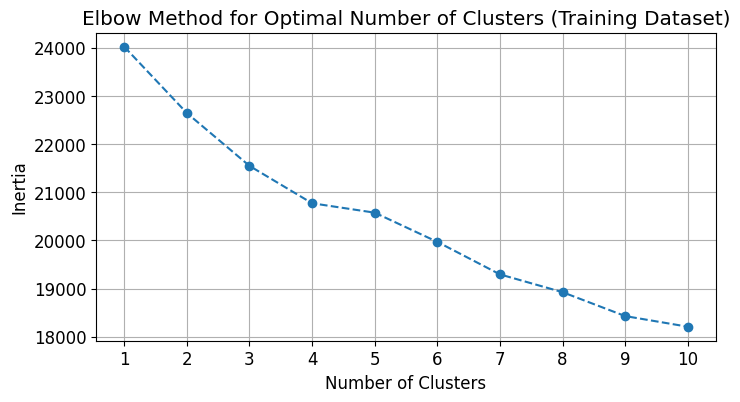


Test dataset elbow method:


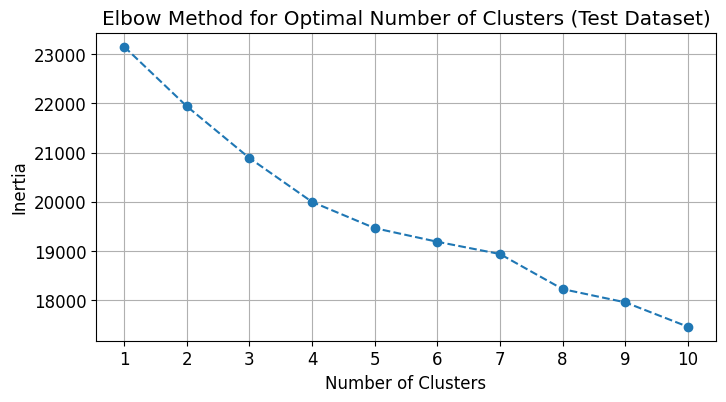

In [115]:
def get_embeddings(df, column_name='job'):
    unique_jobs = df[column_name].drop_duplicates().tolist()
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    return model.encode(unique_jobs)

def plot_elbow_method(embeddings, dataset_name, max_clusters=10):
   
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal Number of Clusters ({dataset_name})')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

embeddings_train = get_embeddings(data, 'job')
embeddings_test = get_embeddings(data_test, 'job')

print("Training dataset elbow method:")
plot_elbow_method(embeddings_train, 'Training Dataset')

print("\nTest dataset elbow method:")
plot_elbow_method(embeddings_test, 'Test Dataset')


In [116]:
def perform_clustering_and_return_results(embeddings, unique_jobs, n_clusters=3):
    cosine_similarities = util.pytorch_cos_sim(embeddings, embeddings)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(cosine_similarities)

    clustered_jobs = {}
    for cluster_id in range(n_clusters):
        clustered_jobs[cluster_id] = [unique_jobs[i] for i in range(len(unique_jobs)) if clusters[i] == cluster_id]
    
    return clustered_jobs

clustered_jobs_train = perform_clustering_and_return_results(embeddings_train, unique_jobs_train, n_clusters=3)
clustered_jobs_test = perform_clustering_and_return_results(embeddings_test, unique_jobs_test, n_clusters=3)



Cluster 0 (Healthcare, Education, Science, and Arts)

Cluster 1 (Engineering, Design, IT, Architecture)

Cluster 2 (Management, Administration, Law, Finance, Public Services)



In [117]:
def encode_job_titles(df, unique_jobs, clustered_jobs):
    job_to_cluster = {job: cluster_id for cluster_id, jobs in clustered_jobs.items() for job in jobs}
    df['job_encoded'] = df['job'].map(job_to_cluster).astype(int)
    
    return df

data_encoded = encode_job_titles(data, unique_jobs_train, clustered_jobs_train)
data_test_encoded = encode_job_titles(data_test, unique_jobs_test, clustered_jobs_test)

print("Training dataset with encoded job titles:")
print(data_encoded[['job', 'job_encoded']].head())

print("\nTest dataset with encoded job titles:")
print(data_test_encoded[['job', 'job_encoded']].head())





Training dataset with encoded job titles:
                           job  job_encoded
0  Information systems manager            2
1  Information systems manager            2
2  Information systems manager            2
3  Information systems manager            2
4  Information systems manager            2

Test dataset with encoded job titles:
                           job  job_encoded
0  Information systems manager            0
1  Information systems manager            0
2  Information systems manager            0
3  Information systems manager            0
4  Information systems manager            0


In [118]:
data

,trans_date_trans_time,cc_num,merchant,amt,street,city,state,zip,city_pop,job,...,age_spend_ratio,is_peak,distance_between_transactions,speed_km_per_hour,distance_to_hotspots,distance_between_cardholder_merchant,amt_std,amt_range,merchant_with_multiple_mcc,job_encoded
0,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,52.94,163,0.272003,1.490119,82514,1645,Information systems manager,...,0.735228,1,224.769219,2.186944e+03,1175.725495,110.308921,122.666680,3074.07,0,2
1,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,82.08,163,0.272003,1.490119,82514,1645,Information systems manager,...,1.139922,1,105.220439,2.667560e+03,1210.465433,21.787261,122.666680,3074.07,0,2
2,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,34.79,163,0.272003,1.490119,82514,1645,Information systems manager,...,0.483162,1,88.152283,4.231310e+03,1156.967700,87.204215,122.666680,3074.07,0,2
3,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,27.18,163,0.272003,1.490119,82514,1645,Information systems manager,...,0.377474,1,132.876773,1.543085e+04,1141.046449,74.212965,122.666680,3074.07,0,2
4,2019-01-03 13:56:35,60416207185,fraud_Stamm-Witting,6.87,163,0.272003,1.490119,82514,1645,Information systems manager,...,0.095410,1,112.505781,3.682007e+04,1251.641661,69.984956,122.666680,3074.07,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295687,2020-06-20 21:04:59,4992346398065154184,"fraud_Berge, Kautzer and Harris",60.47,273,0.158791,3.335608,61335,532,Audiological scientist,...,0.917657,1,72.133978,7.213398e+11,543.486442,78.492562,157.257058,4668.05,0,1
1295688,2020-06-21 00:41:01,4992346398065154184,fraud_Bernhard Inc,74.29,273,0.158791,3.335608,61335,532,Audiological scientist,...,1.127382,1,50.128232,1.503847e+04,555.122901,55.400768,157.257058,4668.05,0,1
1295689,2020-06-21 02:47:59,4992346398065154184,"fraud_Reichert, Rowe and Mraz",246.56,273,0.158791,3.335608,61335,532,Audiological scientist,...,3.741651,1,94.203913,3.083037e+04,526.406762,115.674400,157.257058,4668.05,0,1
1295690,2020-06-21 08:04:28,4992346398065154184,fraud_Jewess LLC,2.62,273,0.158791,3.335608,61335,532,Audiological scientist,...,0.039760,1,61.101214,5.944983e+03,505.207146,60.513397,157.257058,4668.05,0,1


In [119]:
data.drop(columns=['job'], inplace=True)
data_test.drop(columns=['job'], inplace=True)

In [120]:
data.drop(['trans_date_trans_time', 'age_bucket'], axis=1, inplace=True)
data_test.drop(['trans_date_trans_time', 'age_bucket'], axis=1, inplace=True)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295692 entries, 0 to 1295691
Data columns (total 59 columns):
 #   Column                                Non-Null Count    Dtype         
---  ------                                --------------    -----         
 0   cc_num                                1295692 non-null  int64         
 1   merchant                              1295692 non-null  object        
 2   amt                                   1295692 non-null  float64       
 3   street                                1295692 non-null  int64         
 4   city                                  1295692 non-null  float64       
 5   state                                 1295692 non-null  float64       
 6   zip                                   1295692 non-null  int64         
 7   city_pop                              1295692 non-null  int64         
 8   trans_num                             1295692 non-null  object        
 9   unix_time                             1295692 

### Correlation between features 

In [122]:
highly_correlated = find_highly_correlated_features(data)
for feature, correlated in highly_correlated.items():
    print(f"Feature '{feature}' is highly correlated with: [ {' , '.join(correlated)} ]")


Feature 'amt' is highly correlated with: [ age_spend_ratio ]
Feature 'street' is highly correlated with: [ num_trans_per_card , avg_daily_trans ]
Feature 'zip' is highly correlated with: [ merch_long ]
Feature 'unix_time' is highly correlated with: [ card_age_days ]
Feature 'merch_long' is highly correlated with: [ distance_to_hotspots ]
Feature 'age' is highly correlated with: [ age_bucket_avg_spend ]
Feature 'gender_code' is highly correlated with: [ percent_transaction_gender ]
Feature 'day_of_week' is highly correlated with: [ is_weekend , trans_date ]
Feature 'is_weekend' is highly correlated with: [ trans_date ]
Feature 'amt_rolling_mean_30d' is highly correlated with: [ amt_rolling_mean_15d , amt_rolling_mean_60d ]
Feature 'amt_rolling_mean_365d' is highly correlated with: [ amt_rolling_mean_180d ]
Feature 'amt_rolling_mean_60d' is highly correlated with: [ amt_rolling_mean_180d ]
Feature 'num_trans_per_card' is highly correlated with: [ avg_daily_trans ]
Feature 'trans_num_roll

it's not easy to decide which one to drop and which one to retain so i'm going to use techniques of feature selection to see the importance of each feature .

In [123]:
data.drop(['trans_date'], axis=1, inplace=True)
data_test.drop(['trans_date'], axis=1, inplace=True)

In [125]:
data.to_csv('data.csv', index=False)
data_test.to_csv('data_test.csv', index=False)


In [ ]:
data_scaled = pd.read_csv("scaled_training_dataset.csv")
data_test_scaled = pd.read_csv("scaled_test_dataset.csv")



# Feature selection

## PCA 

Fit PCA and Transform Data:



In [ ]:
from sklearn.decomposition import PCA

def apply_pca(train_data, test_data, numeric_colss, n_components=None):
    if n_components is None:
        n_components = train_data[numeric_colss].shape[1]
        
    pca = PCA(n_components=n_components)
    pca.fit(train_data[numeric_colss])
    
    train_pca = pca.transform(train_data[numeric_colss])
    test_pca = pca.transform(test_data[numeric_colss])
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    return train_pca, test_pca, explained_variance, cumulative_variance
data_pca, data_test_pca, explained_variance, cumulative_variance = apply_pca(data_scaled, data_test_scaled, numeric_colss)

print("\nPCA transformed training dataset:")
print(data_pca)

print("\nPCA transformed test dataset:")
print(data_test_pca)

print("\nExplained variance ratio:")
print(explained_variance)

print("\nCumulative variance:")
print(cumulative_variance)



PCA transformed training dataset:
[[ 3.21622600e+00 -6.03607161e+00 -7.06040483e+00 ... -6.30665884e-05
   1.23946922e-14  4.05180000e-15]
 [ 3.95208314e+00 -5.42818241e+00 -7.23551404e+00 ... -4.94785580e-05
   9.17398595e-15  3.50244723e-15]
 [ 3.06670529e+00 -5.52724223e+00 -7.53473296e+00 ... -4.18703919e-05
   8.23416217e-15  2.45463444e-15]
 ...
 [ 1.00707366e+00  6.33982318e-01  2.92159394e+00 ... -4.97903630e-06
  -7.68858328e-15 -6.44035938e-16]
 [-4.15188049e-01  1.35080526e-02  1.66890730e+00 ...  4.26765725e-06
  -6.69476283e-15 -3.32955246e-16]
 [-7.62310701e-01 -1.97488508e-01  7.81516369e-01 ...  3.10239114e-06
  -6.24380186e-15 -9.96625168e-16]]

PCA transformed test dataset:
[[ 5.39490306e+00 -2.00217294e+00 -6.55600367e+00 ... -1.18210272e-05
   9.91607896e-16  2.46252200e-15]
 [ 4.20890986e+00 -2.61848005e+00 -6.64477067e+00 ... -1.12035196e-05
   2.53552630e-15 -8.25250961e-16]
 [ 4.33312534e+00 -2.18609998e+00 -5.90716192e+00 ...  8.34787270e-07
  -1.78151533e-15 

Calculate Explained Variance:


 ## Scree Plot for explained variance 



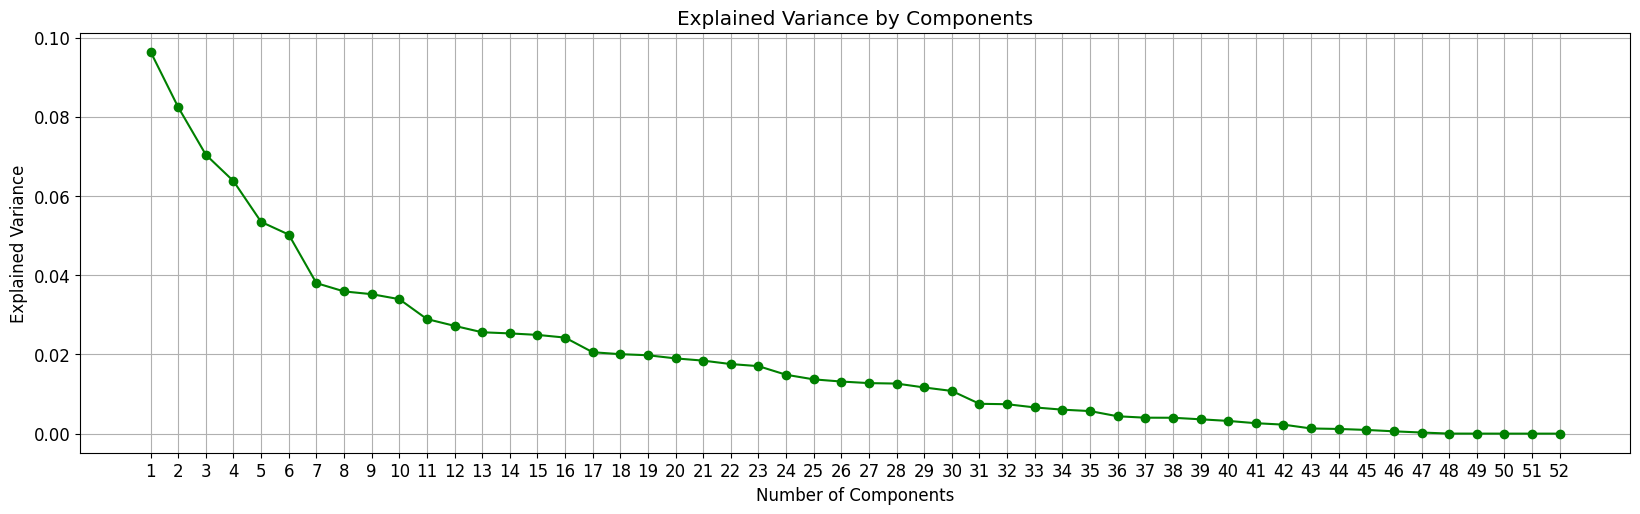

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='g')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)



## Scree plot for cumulative explained variance

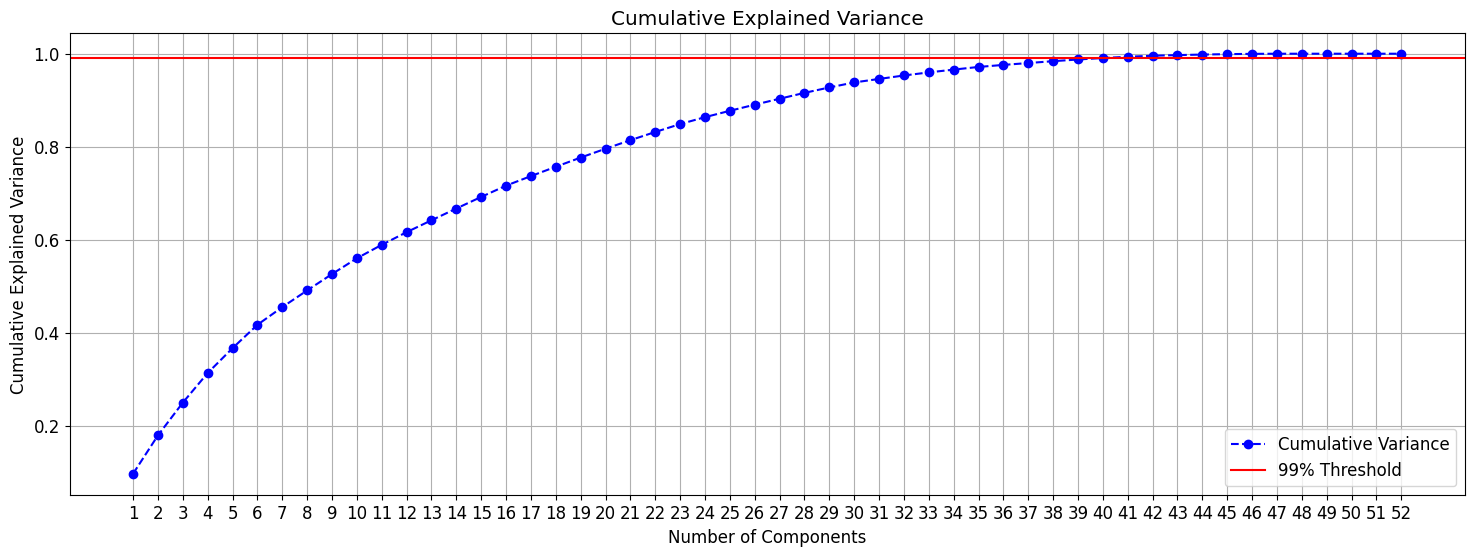

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.99, color='r', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend(['Cumulative Variance', '99% Threshold'])
plt.grid(True)
plt.show()


the cumulative explained variance reaches the 99% threshold at around 36 components. 

In [ ]:
from sklearn.decomposition import PCA
def apply_pca(train_data, test_data, numeric_colss, n_components=36):
    pca = PCA(n_components=n_components)
    pca.fit(train_data[numeric_colss])
    pca_train_data = pca.transform(train_data[numeric_colss])
    pca_test_data = pca.transform(test_data[numeric_colss])
    
    return pca_train_data, pca_test_data, pca


In [ ]:
pca_train_data, pca_test_data, pca = apply_pca(data_scaled,data_test_scaled, numeric_colss, n_components=36)
print(f"PCA-transformed training data shape: {pca_train_data.shape}")
print(f"PCA-transformed test data shape: {pca_test_data.shape}")


PCA-transformed training data shape: (1295692, 36)
PCA-transformed test data shape: (554795, 36)


In [ ]:
components = pca.components_
component_df = pd.DataFrame(components, columns=numeric_colss, index=[f'PC{i+1}' for i in range(components.shape[0])])
print(component_df)
abs_component_df = np.abs(component_df)
print(abs_component_df)


           amt    street      city     state       zip  city_pop  unix_time  \
PC1   0.217936 -0.165938 -0.136282  0.010199 -0.003959 -0.001310  -0.067593   
PC2   0.132064  0.381249  0.318931  0.022691  0.025740  0.060123   0.100014   
PC3   0.110782 -0.106038 -0.094404 -0.017544 -0.012496 -0.038143   0.145374   
PC4  -0.013470 -0.149258 -0.131938  0.003513 -0.012088 -0.018598   0.333624   
PC5  -0.001391 -0.007924 -0.005443  0.004208 -0.016233  0.001747  -0.063872   
PC6   0.000396  0.005674  0.000943  0.178154 -0.534088 -0.015627  -0.002373   
PC7  -0.002876 -0.049329 -0.050724  0.105126 -0.002256  0.000957   0.072240   
PC8   0.349230 -0.010416 -0.021803 -0.006150 -0.042946 -0.038303  -0.319932   
PC9   0.097061 -0.002641  0.014464  0.004757  0.125600  0.041715  -0.102668   
PC10  0.400279  0.021678  0.010460 -0.047769 -0.011951 -0.044000   0.285329   
PC11 -0.059522  0.202047  0.068642 -0.273163 -0.143019 -0.336449  -0.044706   
PC12 -0.000475  0.094205  0.199665  0.255966  0.0982

Important Features

In [ ]:
for i in range(abs_component_df.shape[0]):
    print(f'PC{i+1} important features:')
    print(abs_component_df.loc[f'PC{i+1}'].nlargest(3))
    print()


PC1 important features:
amt_rolling_mean_60d     0.307101
amt_rolling_mean_30d     0.303624
amt_rolling_mean_180d    0.299168
Name: PC1, dtype: float64

PC2 important features:
avg_daily_trans       0.385104
num_trans_per_card    0.385067
street                0.381249
Name: PC2, dtype: float64

PC3 important features:
merchant_amt_rolling_mean_30d    0.347549
merchant_amt_rolling_mean_60d    0.341138
merchant_amt_rolling_mean_15d    0.328191
Name: PC3, dtype: float64

PC4 important features:
unix_time                      0.333624
card_age_days                  0.331619
trans_num_rolling_count_60d    0.329838
Name: PC4, dtype: float64

PC5 important features:
trans_date     0.586554
day_of_week    0.586554
is_weekend     0.547823
Name: PC5, dtype: float64

PC6 important features:
merch_long              0.592380
zip                     0.534088
distance_to_hotspots    0.526041
Name: PC6, dtype: float64

PC7 important features:
gender_code                   0.479338
percent_transaction

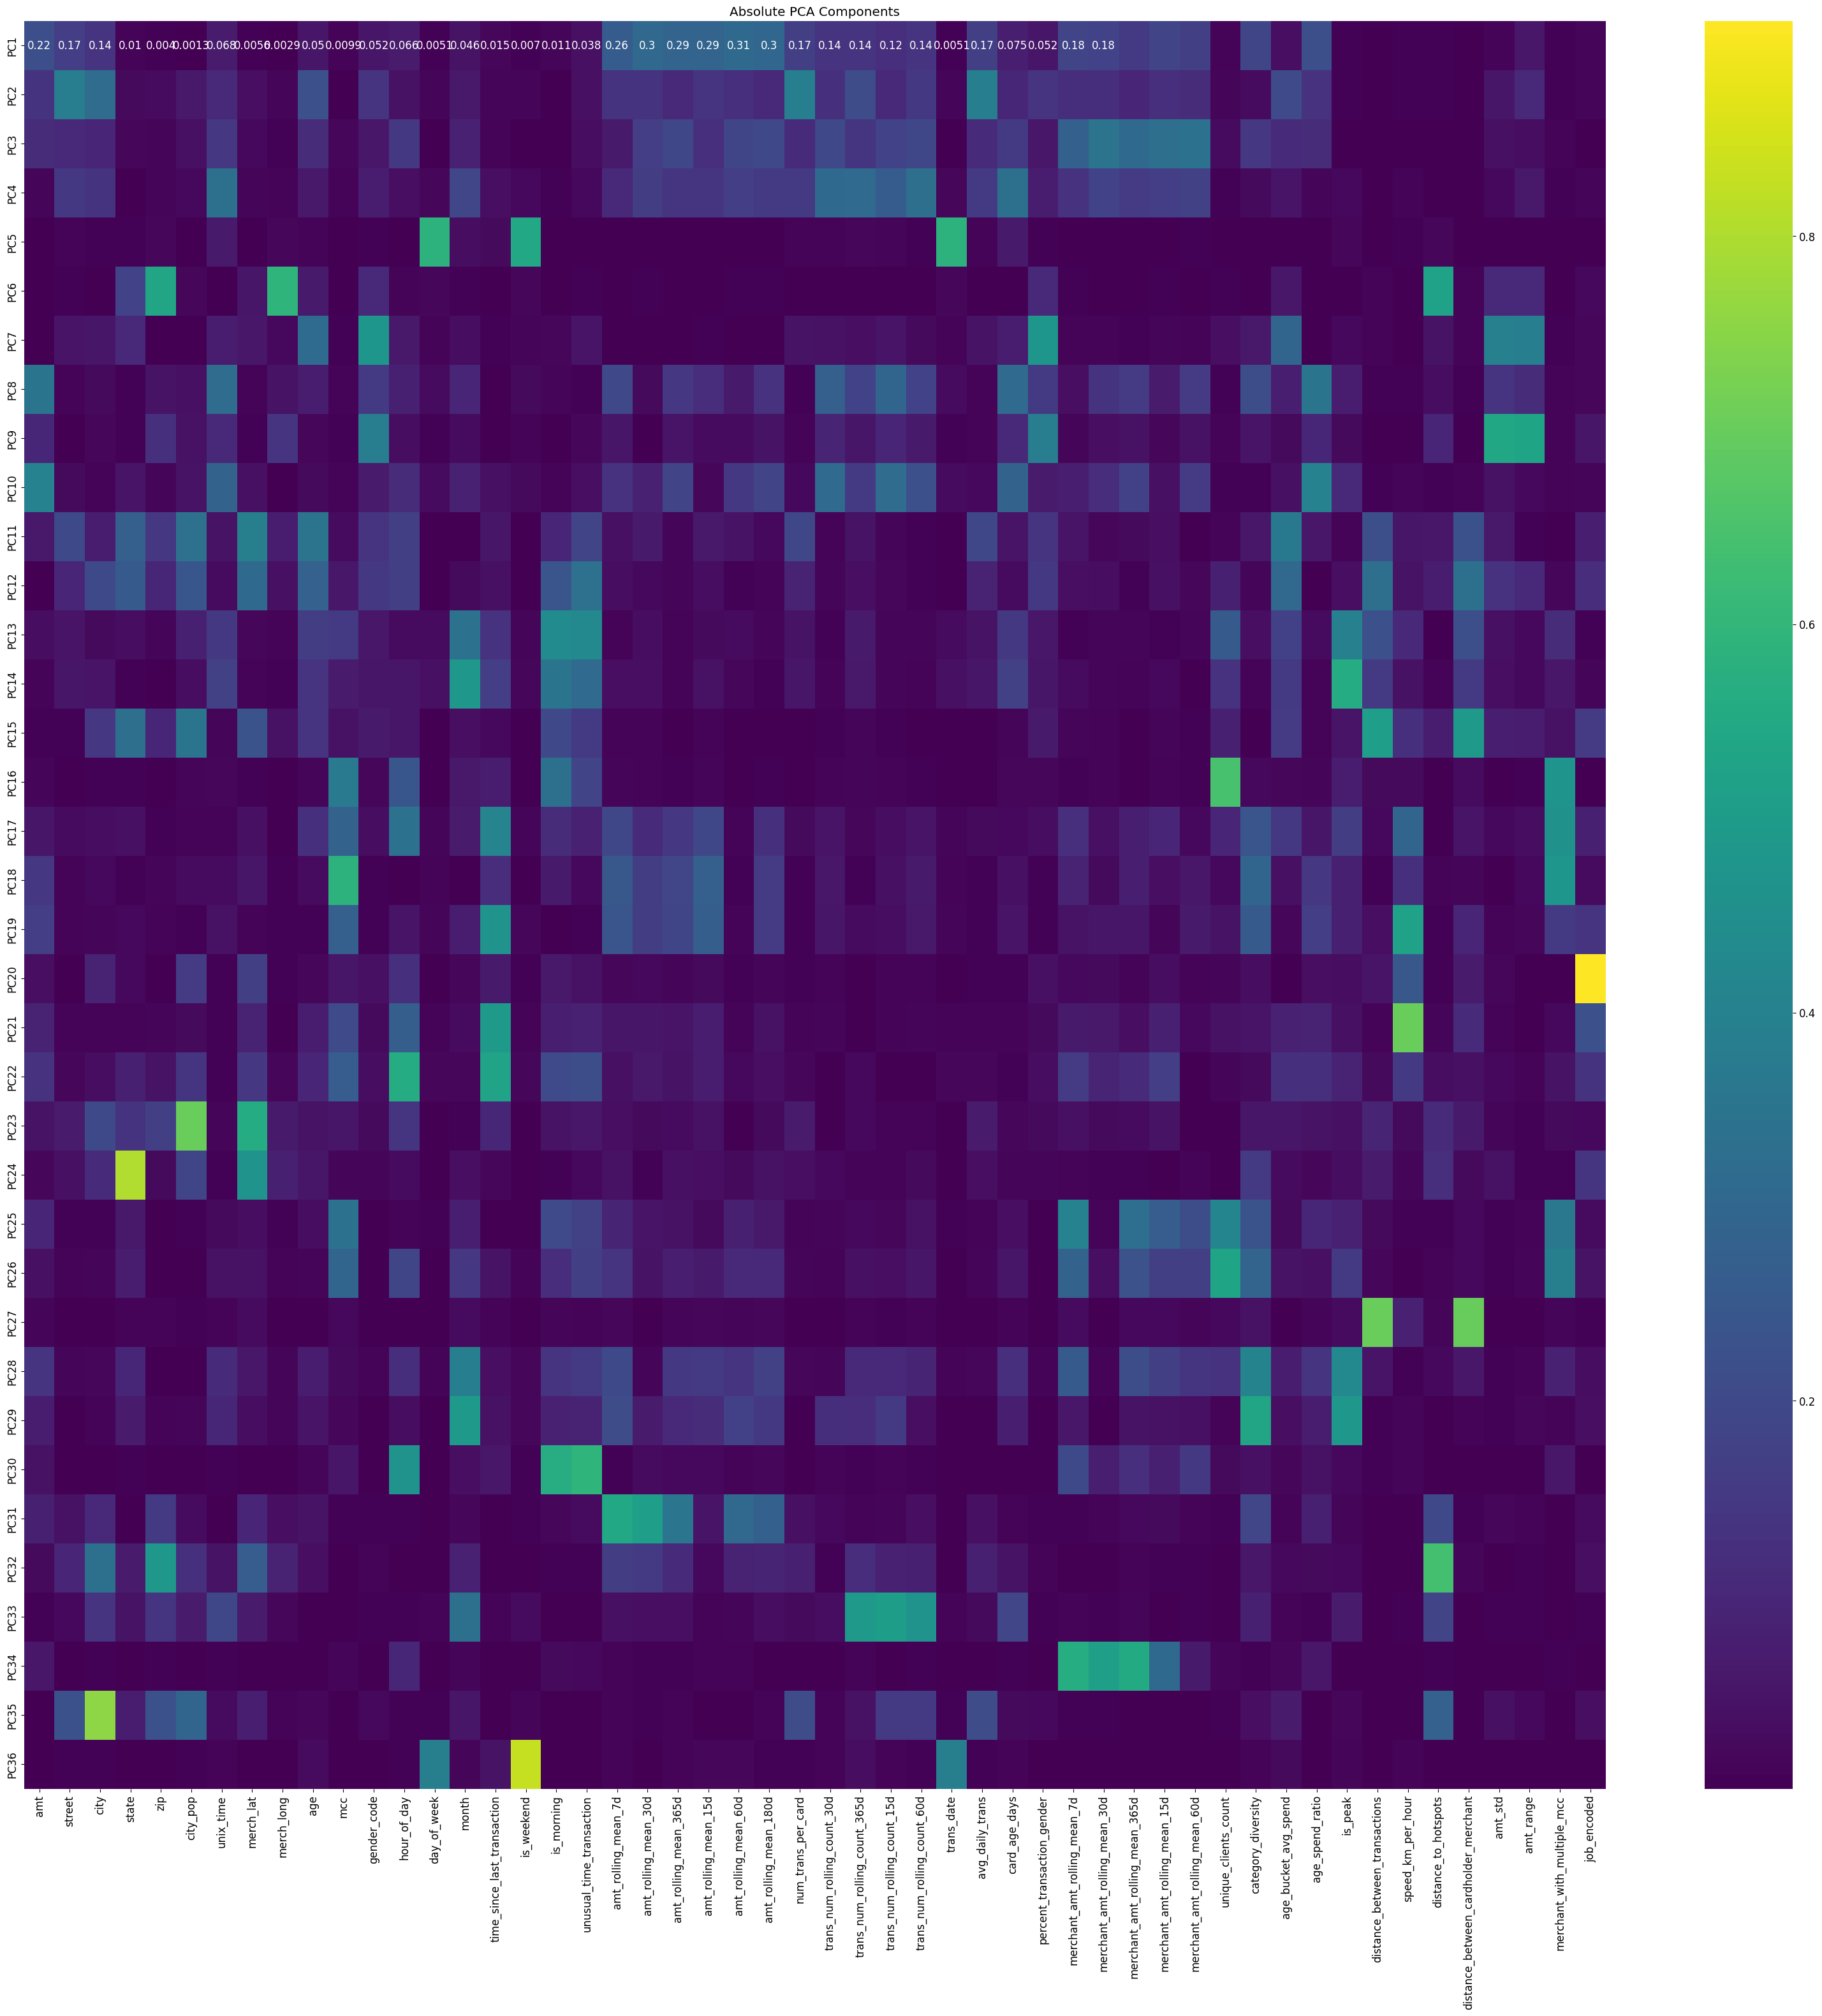

In [ ]:
plt.figure(figsize=(40,36))
sns.heatmap(abs_component_df, annot=True, cmap='viridis')
plt.title('Absolute PCA Components')
plt.show()


Choosing to retain 80% of the variance with PCA is often sufficient because it strikes a balance between reducing dimensionality and preserving most of the original data's variability, which helps in simplifying the model while maintaining its ability to capture essential patterns and relationships

In [ ]:
pca = PCA(n_components=20)

pca.fit(data_scaled[numeric_colss])

data_pca = pca.transform(data_scaled[numeric_colss])
data_test_pca = pca.transform(data_test_scaled[numeric_colss])

data_pca_df = pd.DataFrame(data_pca, columns=[f'PCA_{i+1}' for i in range(20)])
data_test_pca_df = pd.DataFrame(data_test_pca, columns=[f'PCA_{i+1}' for i in range(20)])

data_scaled = data_scaled.drop(columns=numeric_colss)
data_test_scaled = data_test_scaled.drop(columns=numeric_colss)

data_scaled = pd.concat([data_scaled.reset_index(drop=True), data_pca_df.reset_index(drop=True)], axis=1)
data_test_scaled = pd.concat([data_test_scaled.reset_index(drop=True), data_test_pca_df.reset_index(drop=True)], axis=1)


## Independent component analysis (ICA )

IT's used to convert the original feature space into a new space characterized by statistically independent components 

In [ ]:

def apply_fastica(data_scaled, data_test_scaled, n_components=21, random_state=42):
    data_scaled_ica = data_scaled.copy()
    data_test_scaled_ica = data_test_scaled.copy()
    numeric_cols = [
    col for col in data_scaled_ica.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist() 
    if col not in ['cc_num', 'is_fraud']]
    X = data_scaled_ica[numeric_cols]
    ica = FastICA(n_components=n_components, random_state=random_state)
    X_ica = ica.fit_transform(X)
    X_test_ica = ica.transform(data_test_scaled_ica[numeric_cols])
    
    components = ica.components_
    component_df = pd.DataFrame(components, columns=X.columns, index=[f'IC{i+1}' for i in range(n_components)])
    print("ICA Components:")
    print(component_df)
    
    abs_component_df = np.abs(component_df)
    print("Absolute ICA Components:")
    print(abs_component_df)
    
    return X_ica, X_test_ica, component_df, abs_component_df

data_scaled_ica, data_test_scaled_ica = data_scaled.copy(), data_test_scaled.copy()
X_ica, X_test_ica, component_df, abs_component_df = apply_fastica(data_scaled_ica, data_test_scaled_ica)


ICA Components:
           amt    street      city     state       zip       lat      long  \
IC1   0.004211  0.003979  0.020037 -0.081090  0.179306  0.231467 -0.234488   
IC2  -0.005223  0.004314  0.008850 -0.010283 -0.000008 -0.001028 -0.000457   
IC3  -0.000522  0.001530  0.001396  0.002385  0.000633  0.000055 -0.000524   
IC4   0.004274  0.048159  0.081608  0.083428 -0.023579  0.002675  0.029502   
IC5  -0.021642  0.052971 -0.226105 -0.412094 -0.035442 -0.061933  0.025991   
IC6  -0.113720  0.001742 -0.013987 -0.004838  0.005224 -0.002454 -0.002254   
IC7  -0.452327  0.002885 -0.006463  0.000938  0.002535 -0.001665 -0.000973   
IC8  -0.002629 -0.029203 -0.037672  0.014182  0.001465  0.017576 -0.004431   
IC9  -0.002802 -0.000059 -0.026235  0.018872 -0.003145  0.007417  0.008194   
IC10  0.020252 -0.009460  0.020715 -0.190324 -0.052571 -0.062892  0.032507   
IC11  0.003293  0.002744 -0.007371 -0.011598  0.002937 -0.004166 -0.001113   
IC12 -0.002259  0.016501 -0.008451 -0.015235  0.

In [ ]:
most_important_features = {}
unique_features = set()

for i in range(component_df.shape[0]):
    component_name = f'IC{i+1}'
    important_features = abs_component_df.loc[component_name].nlargest(3).index.tolist()
    unique_features.update(important_features)
    most_important_features[component_name] = important_features

important_features_list = list(unique_features)[:20]
print("\nMost Important Features (Top 20):")
print(important_features_list)

data_scaled_ica = data_scaled_ica[important_features_list]
data_test_scaled_ica = data_test_scaled_ica[important_features_list]



Most Important Features (Top 20):
['age_spend_ratio', 'merchant_amt_rolling_mean_7d', 'amt_range', 'trans_num_rolling_count_15d', 'is_weekend', 'merch_long', 'age', 'amt_rolling_mean_30d', 'merchant_with_multiple_mcc', 'unix_time', 'gender_code', 'month', 'is_morning', 'num_trans_per_card', 'distance_to_hotspots', 'state', 'distance_between_cardholder_merchant', 'time_since_last_transaction', 'zip', 'avg_daily_trans']


In [ ]:
data_scaled_ica.head()

,age_spend_ratio,merchant_amt_rolling_mean_7d,amt_range,trans_num_rolling_count_15d,is_weekend,merch_long,age,amt_rolling_mean_30d,merchant_with_multiple_mcc,unix_time,gender_code,month,is_morning,num_trans_per_card,distance_to_hotspots,state,distance_between_cardholder_merchant,time_since_last_transaction,zip,avg_daily_trans
0,-0.115932,-0.047846,-0.064554,-16.506562,-0.731316,-1.366485,-0.70925,-1.045217,-0.139143,-1.852393,0.909148,-1.506305,1.00419,-0.405625,0.974453,-0.84979,1.174366,2.893957,1.253595,-0.405661
1,0.061169,-0.056071,-0.064554,-15.230120,-0.731316,-1.374719,-0.70925,-0.594174,-0.139143,-1.852381,0.909148,-1.506305,1.00419,-0.405625,1.029780,-0.84979,-1.865895,0.919572,1.253595,-0.405661
2,-0.226241,-0.256483,-0.064554,-13.953679,-0.731316,-1.344955,-0.70925,-0.676442,-0.139143,-1.851302,0.909148,-1.506305,1.00419,-0.405625,0.944580,-0.84979,0.380839,0.339380,1.253595,-0.405661
3,-0.272491,-0.155505,-0.064554,-12.677237,-0.731316,-1.297278,-0.70925,-0.765427,-0.139143,-1.851150,0.909148,-1.506305,1.00419,-0.405625,0.919224,-0.84979,-0.065343,-0.041641,1.253595,-0.405661
4,-0.395927,-1.023935,-0.064554,-11.400796,-0.731316,-1.397199,-0.70925,-0.912876,-0.139143,-1.844201,0.909148,-1.506305,1.00419,-0.405625,1.095357,-0.84979,-0.210554,-0.214833,1.253595,-0.405661


In [ ]:
data.is_fraud

0          0
1          0
2          0
3          0
4          0
          ..
1295687    0
1295688    0
1295689    0
1295690    0
1295691    0
Name: is_fraud, Length: 1295692, dtype: int64

### Select kbest 

## Random forest 

Selected features for the training dataset:
Index(['amt', 'amt_rolling_mean_7d', 'age_spend_ratio', 'hour_of_day',
       'amt_rolling_mean_15d', 'unique_clients_count',
       'merchant_amt_rolling_mean_7d', 'merchant_amt_rolling_mean_365d', 'mcc',
       'amt_rolling_mean_30d', 'amt_range', 'merchant_amt_rolling_mean_15d',
       'street', 'avg_daily_trans', 'num_trans_per_card',
       'amt_rolling_mean_365d', 'unusual_time_transaction',
       'merchant_amt_rolling_mean_60d', 'amt_rolling_mean_60d', 'is_morning',
       'merchant_amt_rolling_mean_30d', 'amt_rolling_mean_180d', 'age',
       'category_diversity', 'amt_std', 'unix_time', 'card_age_days', 'city',
       'city_pop', 'merch_lat'],
      dtype='object')

Selected features for the test dataset:
Index(['age_spend_ratio', 'amt', 'amt_rolling_mean_7d', 'hour_of_day',
       'amt_rolling_mean_15d', 'merchant_amt_rolling_mean_7d', 'amt_range',
       'unique_clients_count', 'amt_rolling_mean_30d',
       'merchant_amt_rolling_

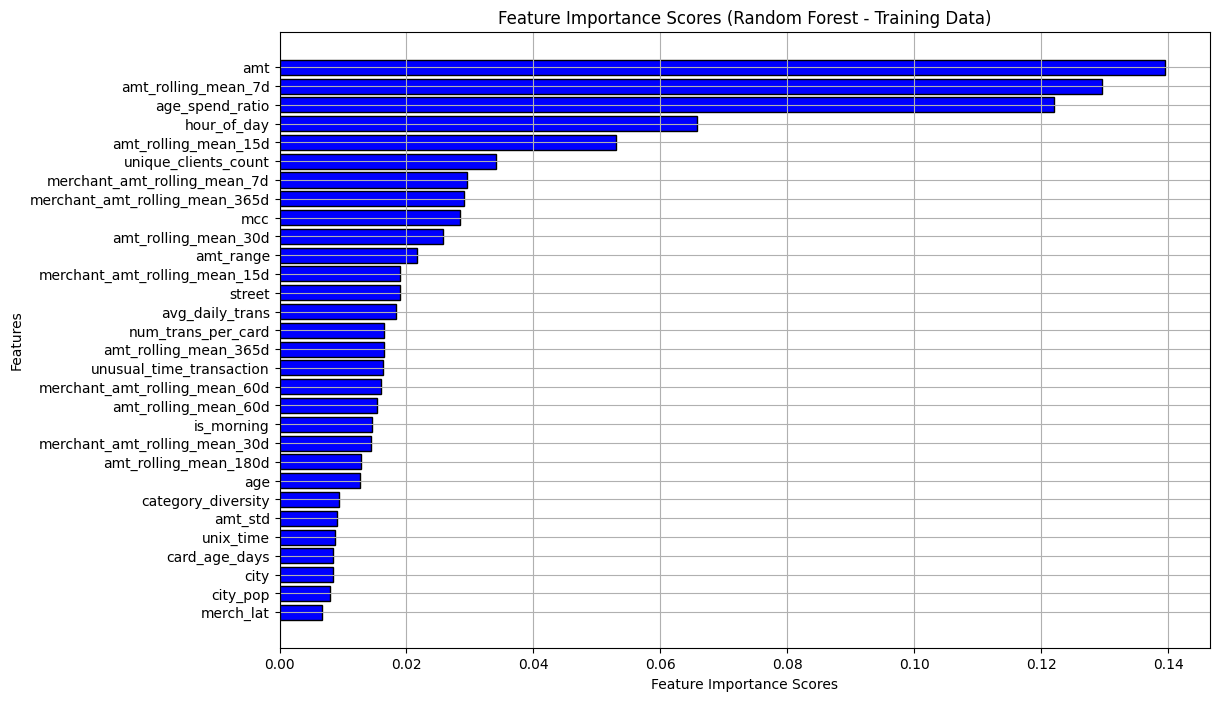

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def select_rf_features(df_data, target_col, num_features=20):
    X = df_data.select_dtypes(include=['number']).drop(columns=[target_col])
    y = df_data[target_col]
    rf = RandomForestClassifier()
    rf.fit(X, y)
    feature_importances = rf.feature_importances_
    
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_columns = X.columns[sorted_indices]
    sorted_scores = feature_importances[sorted_indices]
    
    selected_columns = sorted_columns[:num_features]
    selected_scores = sorted_scores[:num_features]
    
    return selected_columns, selected_scores

# data_scaled['is_fraud'] = data['is_fraud']
# data_test_scaled['is_fraud'] = data_test['is_fraud']

selected_columns_train, selected_scores_train = select_rf_features(data_scaled, 'is_fraud', num_features=30)
selected_columns_test, selected_scores_test = select_rf_features(data_test_scaled, 'is_fraud', num_features=30)

print("Selected features for the training dataset:")
print(selected_columns_train)

print("\nSelected features for the test dataset:")
print(selected_columns_test)

plt.figure(figsize=(12, 8))
plt.barh(selected_columns_train, selected_scores_train, color='blue', edgecolor='black')
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores (Random Forest - Training Data)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()
